In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# plt 한국어 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,960 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
# 일단 시트3

df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/기업 프로젝트/데이터/최종 데이터셋(시트3).xlsx")
df

,라우트,전체공정,품명(코드화),품명,공정(숫자),세부공정,개당 소요\n시간(초)
0,R1_01,사상,AY-ADP-6SM22-00-0-07,04M_R2 AUTO DAMPER DAMPER PLATE STS304,1000,사상,3.098675e+03
1,R1_01,사상,AY-ADP-6SM22-00-0-08,04M_R2 AUTO DAMPER ㄷ형 LASER STS304,1000,사상,3.098892e+03
2,R1_01,사상,AY-ADP-6SM22-00-1-01,UNDER PLATE,1000,사상,2.706465e+03
3,R1_01,사상,AY-ADP-6SM22-00-1-06,04M_R2 AUTO DAMPER SUPPORT LASER STS304,1000,사상,1.324388e+03
4,R1_01,사상,AY-AHF-S0141-00-0-01,"HPS-04R AUTO 열배기 FLANGE, HINGE-1 STS304",1000,사상,5.500000e-01
...,...,...,...,...,...,...,...
28644,R9_07,(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,ZD-KSO-00000-47,분리배기 TOWER Assy,8000,품질검사,8.667700e+04
28645,R9_07,(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,ZD-KSO-00000-53,분리배기 Spray Nozzle,5000,용접,1.311403e+06
28646,R9_07,(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,ZD-KSO-00000-53,분리배기 Spray Nozzle,6000,후처리,1.221215e+05
28647,R9_07,(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,ZD-KSO-00000-53,분리배기 Spray Nozzle,7000,조립,1.468300e+06


In [ ]:
df = df.groupby(["라우트", "전체공정", "품명(코드화)", "품명"]).sum().reset_index()
df

,라우트,전체공정,품명(코드화),품명,공정(숫자),개당 소요\n시간(초)
0,R1_01,사상,AY-ADP-6SM22-00-0-07,04M_R2 AUTO DAMPER DAMPER PLATE STS304,1000,3.098675e+03
1,R1_01,사상,AY-ADP-6SM22-00-0-08,04M_R2 AUTO DAMPER ㄷ형 LASER STS304,1000,3.098892e+03
2,R1_01,사상,AY-ADP-6SM22-00-1-01,UNDER PLATE,1000,2.706465e+03
3,R1_01,사상,AY-ADP-6SM22-00-1-06,04M_R2 AUTO DAMPER SUPPORT LASER STS304,1000,1.324388e+03
4,R1_01,사상,AY-AHF-S0141-00-0-01,"HPS-04R AUTO 열배기 FLANGE, HINGE-1 STS304",1000,5.500000e-01
...,...,...,...,...,...,...
10882,R9_07,(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,IE-KSO-00000-23,20210823 관로형 4구 소독기,26000,5.896976e+06
10883,R9_07,(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,JR-KSO-00000-10,[20211201] 역류방지탱크 2P,26000,8.947220e+05
10884,R9_07,(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,JR-KSO-00000-11,[20211201] 역류방지탱크 1P,26000,8.947130e+05
10885,R9_07,(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,ZD-KSO-00000-47,분리배기 TOWER Assy,26000,1.908303e+06


In [ ]:
df.columns

Index(['라우트', '전체공정', '품명(코드화)', '품명', '공정(숫자)', '개당 소요\n시간(초)'], dtype='object')

In [ ]:
df["품명"].value_counts()

TOP FLANGE                            71
Top Blade                             71
Bottom Blade                          58
Back Cover                            56
BOTTOM FLANGE                         55
                                      ..
Protection Ring Outer   DPV160 LOT     1
Cylinder Body                          1
Flange Lower  DEV160                   1
Feedthrough Cap  Lower                 1
분리배기 Spray Nozzle                      1
Name: 품명, Length: 6693, dtype: int64

In [ ]:
df[df["품명"] == "TOP FLANGE"]

,라우트,전체공정,품명(코드화),품명,공정(숫자),개당 소요\n시간(초)
92,R1_01,사상,AY-NSS-S0203-00-1-04,TOP FLANGE,1000,1.120000
257,R1_01,사상,EF-KHC-62988-00-1-01,TOP FLANGE,1000,58.547500
858,R2_03,CNC > 세정 > 입고처리,AY-HCB-0TB01-00-1-08,TOP FLANGE,6000,86800.000000
869,R2_03,CNC > 세정 > 입고처리,AY-HCB-42CB0-00-1-01,TOP FLANGE,6000,7940.366363
899,R2_03,CNC > 세정 > 입고처리,AY-HCB-6WHCB-00-1-01,TOP FLANGE,6000,4033.700000
...,...,...,...,...,...,...
4564,R2_21,CNC > MCT > 세정 > 타각 > 입고처리,AY-MCB-4SMC1-00-1-01,TOP FLANGE,13100,199018.100000
4566,R2_21,CNC > MCT > 세정 > 타각 > 입고처리,AY-MCB-S0502-00-1-01,TOP FLANGE,13100,237172.037500
4599,R2_32,CNC > 세정 > 타각 > 입고처리,KT-RCH-61004-00-1-01,TOP FLANGE,10100,192280.859999
4615,R2_36,CNC > MCT > 세정 > 타각 > 입고처리,AY-MCB-4RMC0-00-1-01,TOP FLANGE,13100,36726.865000


In [ ]:
# 시트 3은 너무 의미 없는 컬럼만 있어서 날짜별로 제품 필터링 해도 의미 없을 것 같아서 시트 1
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/기업 프로젝트/데이터/최종 데이터셋(시트1).xlsx")
df

,Unnamed: 0,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
0,0.0,N1803120140100,5166.666667,5.778593e+05,50.0,11557.186667,2018-05-10 11:03:22.407000,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,MCT > 후처리 > 입고처리
1,1.0,N1803120180100,4375.000000,6.318738e+05,50.0,12637.475000,2018-10-17 15:38:19.880000,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,CNC > MCT > 후처리 > 입고처리
2,2.0,N1803140150100,2500.000000,3.052445e+05,15.0,20349.635000,2018-05-24 13:42:27.630000,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리
3,3.0,N1803140150200,2500.000000,3.049215e+05,7.0,43560.215000,2018-05-24 13:42:41.740000,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리
4,4.0,N1804030040100,3666.666667,1.152435e+06,30.0,38414.490000,2018-05-30 09:52:43.887000,BU-TCS-11940-00-0-08,Triton Ch Slid Worm Cover-2 AL6061봉재,CNC > MCT > 후처리 > 입고처리
...,...,...,...,...,...,...,...,...,...,...
36464,36464.0,N2204270350100,3000.000000,1.633000e+03,6.0,272.170000,2022-04-28 14:57:19.157000,BU-BLD-23060-00-1-01,BLADE,MCT > 입고처리
36465,36465.0,N2204270370100,3000.000000,2.061800e+04,120.0,171.820000,2022-05-03 08:49:49.777000,AY-KSW-SRING-00-0-02,SUS RING-2,CNC > 세정 > 입고처리
36466,36466.0,N2204270830100,5000.000000,2.975200e+04,16.0,1859.500000,2022-05-02 21:51:57.030000,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,용접 > 후처리 > 입고처리
36467,36467.0,N2204270840100,5000.000000,2.974500e+04,16.0,1859.060000,2022-05-02 21:52:04.607000,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,용접 > 후처리 > 입고처리


In [ ]:
# 리드타임이 0인 이상치 제거

df = df[df["총 리드타임"] != 0]
df

,Unnamed: 0,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
0,0.0,N1803120140100,5166.666667,5.778593e+05,50.0,11557.186667,2018-05-10 11:03:22.407000,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,MCT > 후처리 > 입고처리
1,1.0,N1803120180100,4375.000000,6.318738e+05,50.0,12637.475000,2018-10-17 15:38:19.880000,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,CNC > MCT > 후처리 > 입고처리
2,2.0,N1803140150100,2500.000000,3.052445e+05,15.0,20349.635000,2018-05-24 13:42:27.630000,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리
3,3.0,N1803140150200,2500.000000,3.049215e+05,7.0,43560.215000,2018-05-24 13:42:41.740000,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리
4,4.0,N1804030040100,3666.666667,1.152435e+06,30.0,38414.490000,2018-05-30 09:52:43.887000,BU-TCS-11940-00-0-08,Triton Ch Slid Worm Cover-2 AL6061봉재,CNC > MCT > 후처리 > 입고처리
...,...,...,...,...,...,...,...,...,...,...
36464,36464.0,N2204270350100,3000.000000,1.633000e+03,6.0,272.170000,2022-04-28 14:57:19.157000,BU-BLD-23060-00-1-01,BLADE,MCT > 입고처리
36465,36465.0,N2204270370100,3000.000000,2.061800e+04,120.0,171.820000,2022-05-03 08:49:49.777000,AY-KSW-SRING-00-0-02,SUS RING-2,CNC > 세정 > 입고처리
36466,36466.0,N2204270830100,5000.000000,2.975200e+04,16.0,1859.500000,2022-05-02 21:51:57.030000,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,용접 > 후처리 > 입고처리
36467,36467.0,N2204270840100,5000.000000,2.974500e+04,16.0,1859.060000,2022-05-02 21:52:04.607000,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,용접 > 후처리 > 입고처리


In [ ]:
df["날짜"] = pd.to_datetime(df["날짜"])
df.drop("Unnamed: 0", inplace = True, axis = 1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
0,N1803120140100,5166.666667,5.778593e+05,50.0,11557.186667,2018-05-10 11:03:22.407,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,MCT > 후처리 > 입고처리
1,N1803120180100,4375.000000,6.318738e+05,50.0,12637.475000,2018-10-17 15:38:19.880,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,CNC > MCT > 후처리 > 입고처리
2,N1803140150100,2500.000000,3.052445e+05,15.0,20349.635000,2018-05-24 13:42:27.630,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리
3,N1803140150200,2500.000000,3.049215e+05,7.0,43560.215000,2018-05-24 13:42:41.740,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리
4,N1804030040100,3666.666667,1.152435e+06,30.0,38414.490000,2018-05-30 09:52:43.887,BU-TCS-11940-00-0-08,Triton Ch Slid Worm Cover-2 AL6061봉재,CNC > MCT > 후처리 > 입고처리
...,...,...,...,...,...,...,...,...,...
36464,N2204270350100,3000.000000,1.633000e+03,6.0,272.170000,2022-04-28 14:57:19.157,BU-BLD-23060-00-1-01,BLADE,MCT > 입고처리
36465,N2204270370100,3000.000000,2.061800e+04,120.0,171.820000,2022-05-03 08:49:49.777,AY-KSW-SRING-00-0-02,SUS RING-2,CNC > 세정 > 입고처리
36466,N2204270830100,5000.000000,2.975200e+04,16.0,1859.500000,2022-05-02 21:51:57.030,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,용접 > 후처리 > 입고처리
36467,N2204270840100,5000.000000,2.974500e+04,16.0,1859.060000,2022-05-02 21:52:04.607,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,용접 > 후처리 > 입고처리


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36366 entries, 0 to 36468
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   LOTID    36366 non-null  object        
 1   공정(번호)   36366 non-null  float64       
 2   시차(초)    36366 non-null  float64       
 3   개수       36366 non-null  float64       
 4   총 리드타임   36366 non-null  float64       
 5   날짜       36366 non-null  datetime64[ns]
 6   품명(코드화)  36366 non-null  object        
 7   품명       36366 non-null  object        
 8   전체공정     36366 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 2.8+ MB


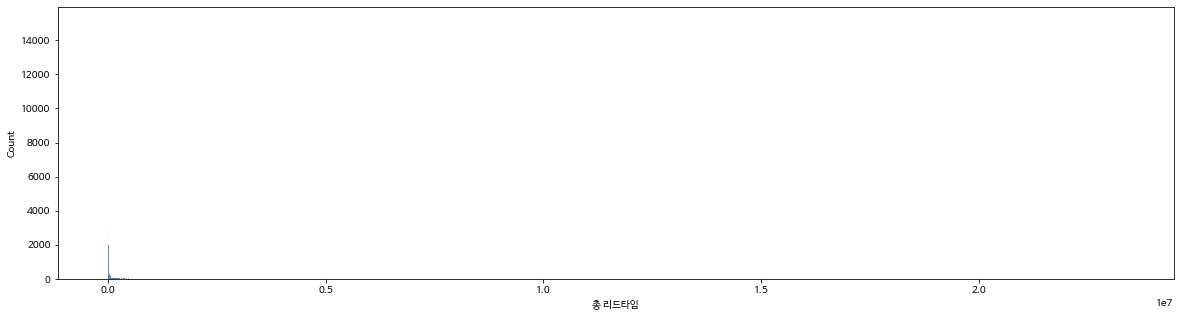

In [ ]:
# 총 리드타임 히스토그램
plt.figure(figsize=(20, 5))
sns.histplot(data = df, x = "총 리드타임")
plt.show()

In [ ]:
pd.DataFrame(df["총 리드타임"].value_counts())

,총 리드타임
9.000000,20
14.000000,18
10.000000,17
2.750000,15
5.500000,15
...,...
1919.190000,1
9.906667,1
9.810000,1
13.713333,1


In [ ]:
min(df["총 리드타임"])

0.01

In [ ]:
max(df["총 리드타임"])

23314371.0

# => 총 리드타임(종속변수)

1. 위의 히스토그램에서 보기를 대부분이 0쪽에 있는 것 같지만 단위가 1e7이라 100만이다. 그래서 잘 안 보임 + 확실한 이상치의 기준이 없다.

2. boxplot에서 150만도 있는데 230만은 괜찮은거 아니야고 볼 수 있는데 cnc/mct/입고처리 대부분이 50만 이전인데 230만은 이상치라고 간주하던가 아니면 우리가 찾아야하는 병목이나 공정 순서로 인한 특별한 제품이다.

3. 같은 공정을 거쳐도 제품별로 총 리드타임이 최소 6000에서  150만까지 차이가 상당함 -> 원인으로 공정에 제품이 들어가는 순서, 한 라우트에서 몇 공정의 병목을 들 수 있음 -> 이걸 해결하는 것이 목표였음

In [ ]:
df["총 리드타임"].value_counts()

9.000000       20
14.000000      18
10.000000      17
2.750000       15
5.500000       15
               ..
1919.190000     1
9.906667        1
9.810000        1
13.713333       1
683.020000      1
Name: 총 리드타임, Length: 32280, dtype: int64

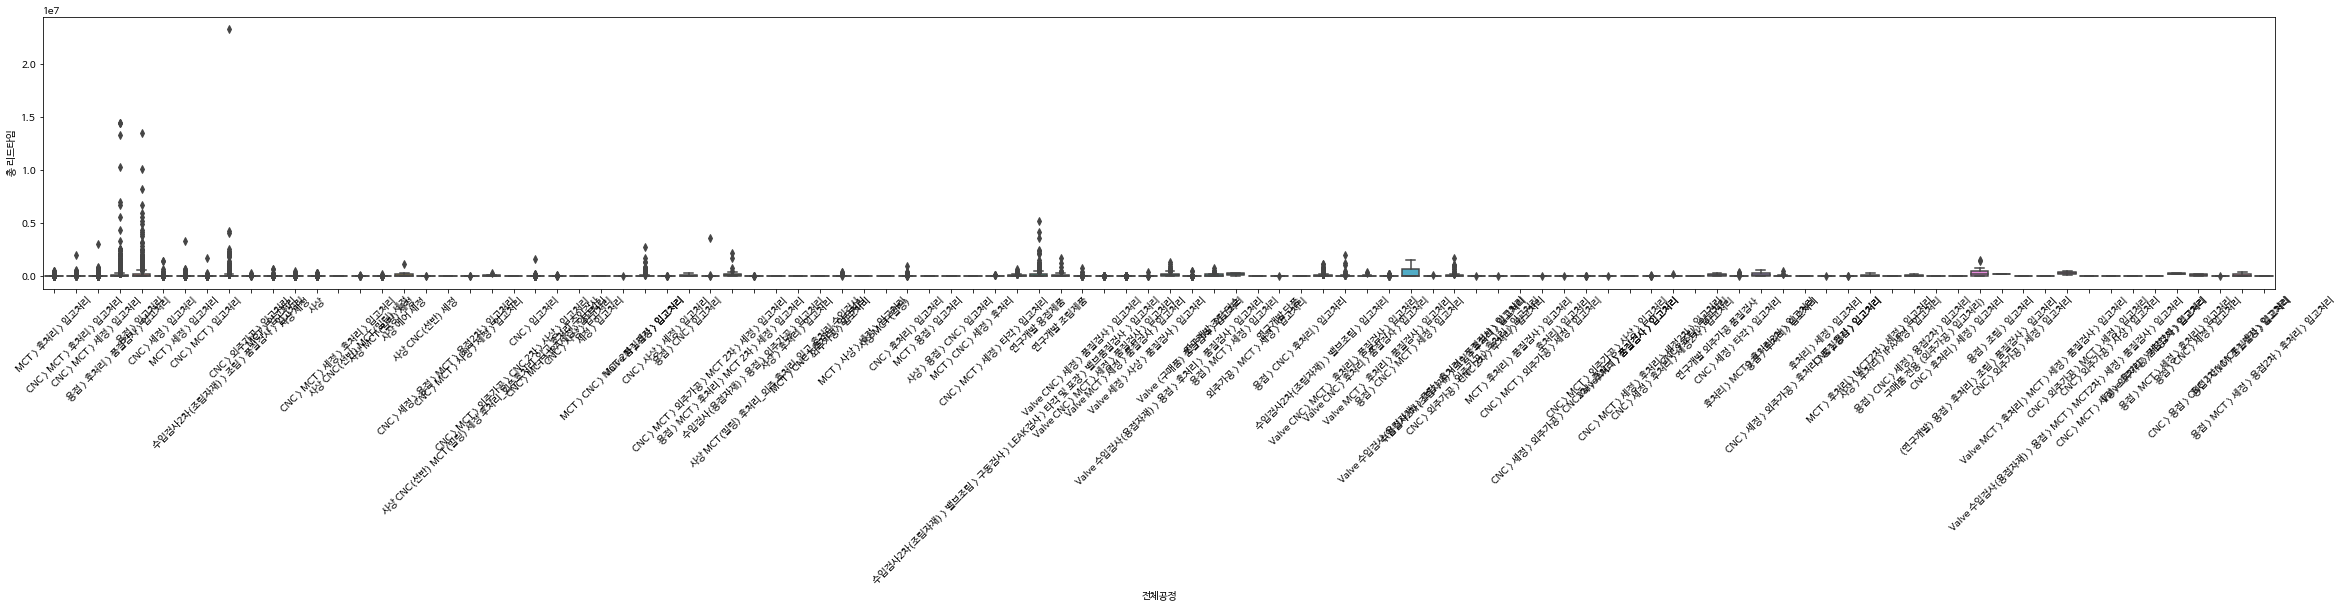

In [ ]:
# boxplot
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
sns.boxplot(x='전체공정', y='총 리드타임', data=df)
plt.show()

# 여기서 가설을 생각해 볼 수 있다.(count가 1인 것은 보지 않는다.)

- 이것은 지금 굳이 볼 필요 없다. EDA는 나중에 하고 기업별 제품 추려서 해보자.

In [ ]:
# groupby
display(df['총 리드타임'].groupby(df['전체공정']).describe()) # 대표치가 평균이 아니고 50%

,count,mean,std,min,25%,50%,75%,max
전체공정,,,,,,,,
(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,13.0,403505.349231,548450.035668,6669.480000,32037.735000,223678.250000,477075.750000,1.577142e+06
CNC > MCT > IPA세정 > 입고처리,42.0,12185.682004,27875.104532,0.143333,895.622500,3706.663333,7972.668542,1.456908e+05
CNC > MCT > 사상 > 세정 > 입고처리,25.0,4250.507700,11799.369558,0.475000,4.075000,137.000000,3076.942500,5.926716e+04
CNC > MCT > 세정 > 외주가공 > 세정2차 > 입고처리,1.0,3.060000,NaN,3.060000,3.060000,3.060000,3.060000,3.060000e+00
CNC > MCT > 세정 > 입고처리,5423.0,11252.035568,57077.346227,0.020000,110.880000,1983.626667,7208.346667,3.065669e+06
...,...,...,...,...,...,...,...,...
용접 > 후처리 > 입고처리,82.0,54864.716463,70264.947436,1797.910000,14595.752500,31043.000000,74296.398750,5.140282e+05
용접 > 후처리 > 품질검사 > 입고처리,6857.0,130754.768668,446952.323596,0.050000,10524.086667,40721.750000,130508.466667,1.449566e+07
후처리 > MCT > 후처리2차 > 입고처리,4.0,211588.139167,244029.462345,27.333333,69231.833333,144564.000000,286920.305833,5.571972e+05


In [ ]:
# 전체공정이 한 번만 나오는 애 제거 왜? 비교 대상이 아니므로

dfCount = pd.DataFrame(df['전체공정'].value_counts())
a_list = dfCount[dfCount['전체공정']>2].index.tolist()
df = df.loc[df['전체공정'].isin(a_list)]
df

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
0,N1803120140100,5166.666667,5.778593e+05,50.0,11557.186667,2018-05-10 11:03:22.407,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,MCT > 후처리 > 입고처리
1,N1803120180100,4375.000000,6.318738e+05,50.0,12637.475000,2018-10-17 15:38:19.880,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,CNC > MCT > 후처리 > 입고처리
2,N1803140150100,2500.000000,3.052445e+05,15.0,20349.635000,2018-05-24 13:42:27.630,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리
3,N1803140150200,2500.000000,3.049215e+05,7.0,43560.215000,2018-05-24 13:42:41.740,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리
4,N1804030040100,3666.666667,1.152435e+06,30.0,38414.490000,2018-05-30 09:52:43.887,BU-TCS-11940-00-0-08,Triton Ch Slid Worm Cover-2 AL6061봉재,CNC > MCT > 후처리 > 입고처리
...,...,...,...,...,...,...,...,...,...
36464,N2204270350100,3000.000000,1.633000e+03,6.0,272.170000,2022-04-28 14:57:19.157,BU-BLD-23060-00-1-01,BLADE,MCT > 입고처리
36465,N2204270370100,3000.000000,2.061800e+04,120.0,171.820000,2022-05-03 08:49:49.777,AY-KSW-SRING-00-0-02,SUS RING-2,CNC > 세정 > 입고처리
36466,N2204270830100,5000.000000,2.975200e+04,16.0,1859.500000,2022-05-02 21:51:57.030,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,용접 > 후처리 > 입고처리
36467,N2204270840100,5000.000000,2.974500e+04,16.0,1859.060000,2022-05-02 21:52:04.607,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,용접 > 후처리 > 입고처리


# => 원래는 mct 사이클 타임(종속변수)을 총 리드타임으로 보면

1. 카운트
2. 이상치
3. describe -> 사이클 타임을 예측할 때는 공정이 전체 공정이라 품명으로 바꿨지만 여기서는 총 리드타임을 예측하므로 공정으로도 되고 품명으로도 됨

### 공정으로

In [ ]:
df['총 리드타임'].value_counts()

9.000000      20
14.000000     18
10.000000     17
2.750000      15
13.000000     15
              ..
13.713333      1
9.236667       1
9.535714       1
264.570000     1
683.020000     1
Name: 총 리드타임, Length: 32262, dtype: int64

In [ ]:
df['총 리드타임'].groupby(df['전체공정']).describe() # 대표치가 평균이 아니고 50%

,count,mean,std,min,25%,50%,75%,max
전체공정,,,,,,,,
(연구개발) 용접 > 후처리 > 조립 > 품질검사 > 입고처리,13.0,403505.349231,548450.035668,6669.480000,32037.735000,223678.250000,477075.750000,1.577142e+06
CNC > MCT > IPA세정 > 입고처리,42.0,12185.682004,27875.104532,0.143333,895.622500,3706.663333,7972.668542,1.456908e+05
CNC > MCT > 사상 > 세정 > 입고처리,25.0,4250.507700,11799.369558,0.475000,4.075000,137.000000,3076.942500,5.926716e+04
CNC > MCT > 세정 > 입고처리,5423.0,11252.035568,57077.346227,0.020000,110.880000,1983.626667,7208.346667,3.065669e+06
CNC > MCT > 세정 > 타각 > 입고처리,54.0,27977.841898,44571.802618,1.200000,1950.271875,10655.125000,31551.356250,1.743766e+05
...,...,...,...,...,...,...,...,...
용접 > 후처리 > 입고처리,82.0,54864.716463,70264.947436,1797.910000,14595.752500,31043.000000,74296.398750,5.140282e+05
용접 > 후처리 > 품질검사 > 입고처리,6857.0,130754.768668,446952.323596,0.050000,10524.086667,40721.750000,130508.466667,1.449566e+07
후처리 > MCT > 후처리2차 > 입고처리,4.0,211588.139167,244029.462345,27.333333,69231.833333,144564.000000,286920.305833,5.571972e+05


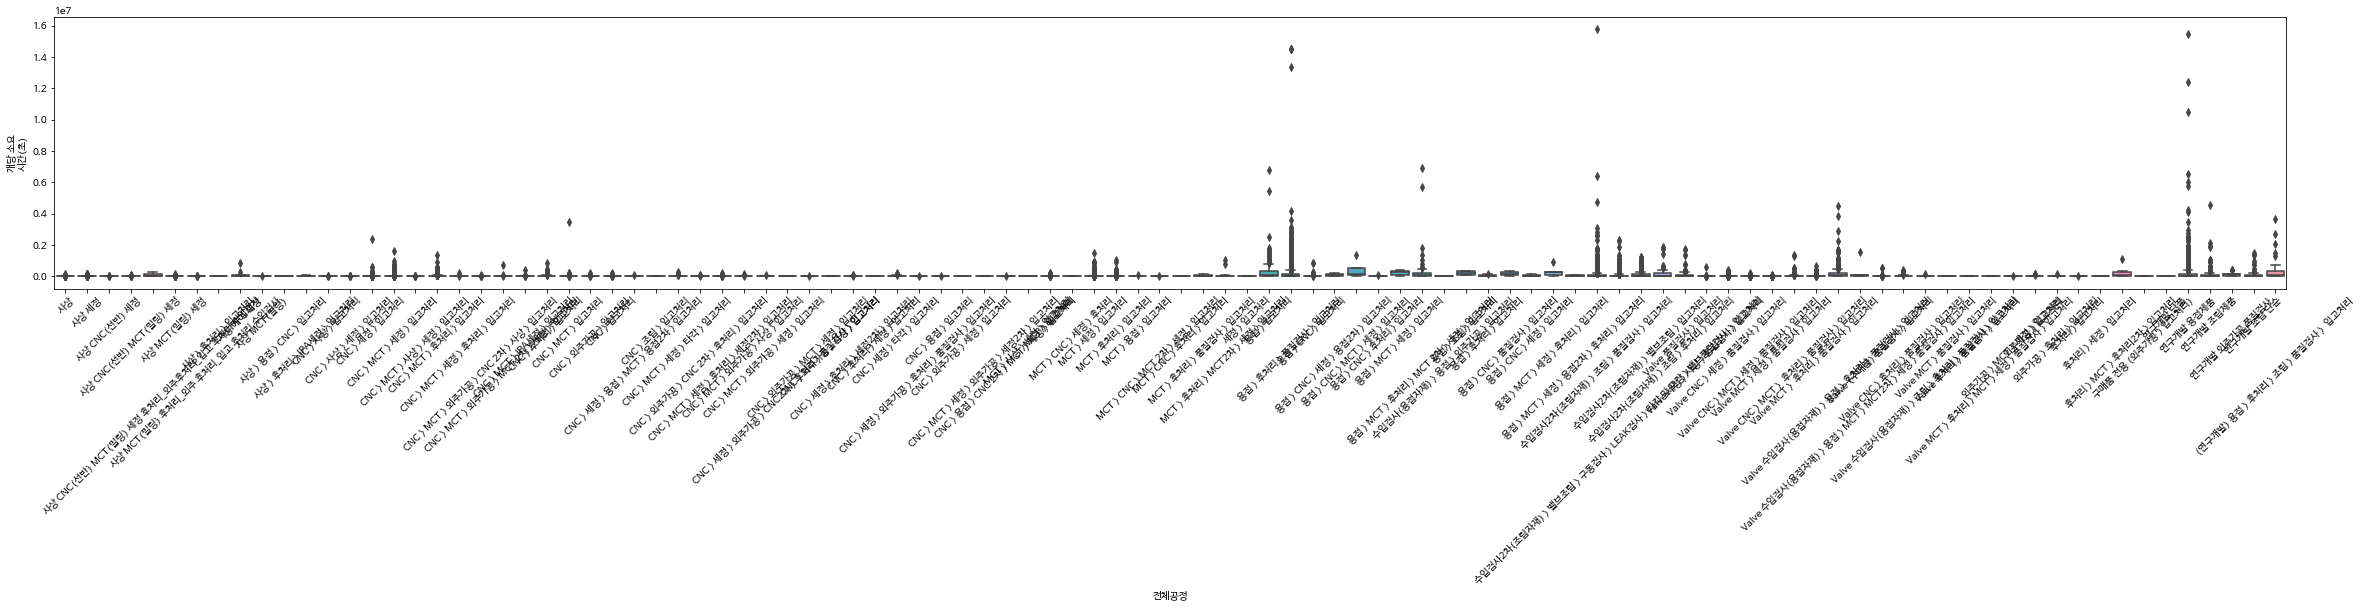

In [ ]:
# boxplot
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
sns.boxplot(x='전체공정', y='총 리드타임', data=df)
plt.show()

In [ ]:
# 이상치 기준을 몇으로 잡을까
df[df["총 리드타임"] > 20000000]

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
8579,N1912110100101,7500.0,23314371.0,1.0,23314371.0,2021-06-04 08:13:13.627,BU-TCS-11340-00,TOSHIBA Ch Slid Ass'y,수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리


#### 품명으로

In [ ]:
df['총 리드타임'].value_counts()

9.000000      20
14.000000     18
10.000000     17
2.750000      15
13.000000     15
              ..
13.713333      1
9.236667       1
9.535714       1
264.570000     1
683.020000     1
Name: 총 리드타임, Length: 32262, dtype: int64

In [ ]:
df['총 리드타임'].groupby(df['품명']).describe() # 대표치가 평균이 아니고 50%

,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
123,5.0,2.640256e+05,1.394753e+05,34163.300000,240172.666667,304245.500000,3.707590e+05,3.707877e+05
(S4120203) - OUTLET Lower Tower (AY-OLT-S0203-00-1) HPS-04,1.0,1.704819e+05,NaN,170481.890000,170481.890000,170481.890000,1.704819e+05,1.704819e+05
240 SCRAPER Ass'y,1.0,2.787347e+05,NaN,278734.666667,278734.666667,278734.666667,2.787347e+05,2.787347e+05
9314-114-960 CYCLONE FAN,1.0,7.283417e+03,NaN,7283.417500,7283.417500,7283.417500,7.283417e+03,7.283417e+03
9319-107-540 HEAT WET SCRAPER ASS`Y,1.0,3.787533e+04,NaN,37875.333333,37875.333333,37875.333333,3.787533e+04,3.787533e+04
...,...,...,...,...,...,...,...,...
"효율개선 HEATING CHAMBER ASSY, CHAMBER INNER TUBE FLANGE, STS304",3.0,8.159283e+03,1.232697e+04,6.100000,1068.800000,2131.500000,1.223588e+04,2.234025e+04
"효율개선 HEATING CHAMBER ASSY, CHAMBER INNER TUBE PIPE STS304",3.0,7.462517e+03,1.288494e+04,6.050000,23.400000,40.750000,1.119075e+04,2.234075e+04
효율개선 HEATING CHAMBER INNER TUBE ASSY-W,1.0,7.192500e+04,NaN,71925.000000,71925.000000,71925.000000,7.192500e+04,7.192500e+04


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8709 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8709 missing from current font.
  font.set_text(s, 0, flags=flags)


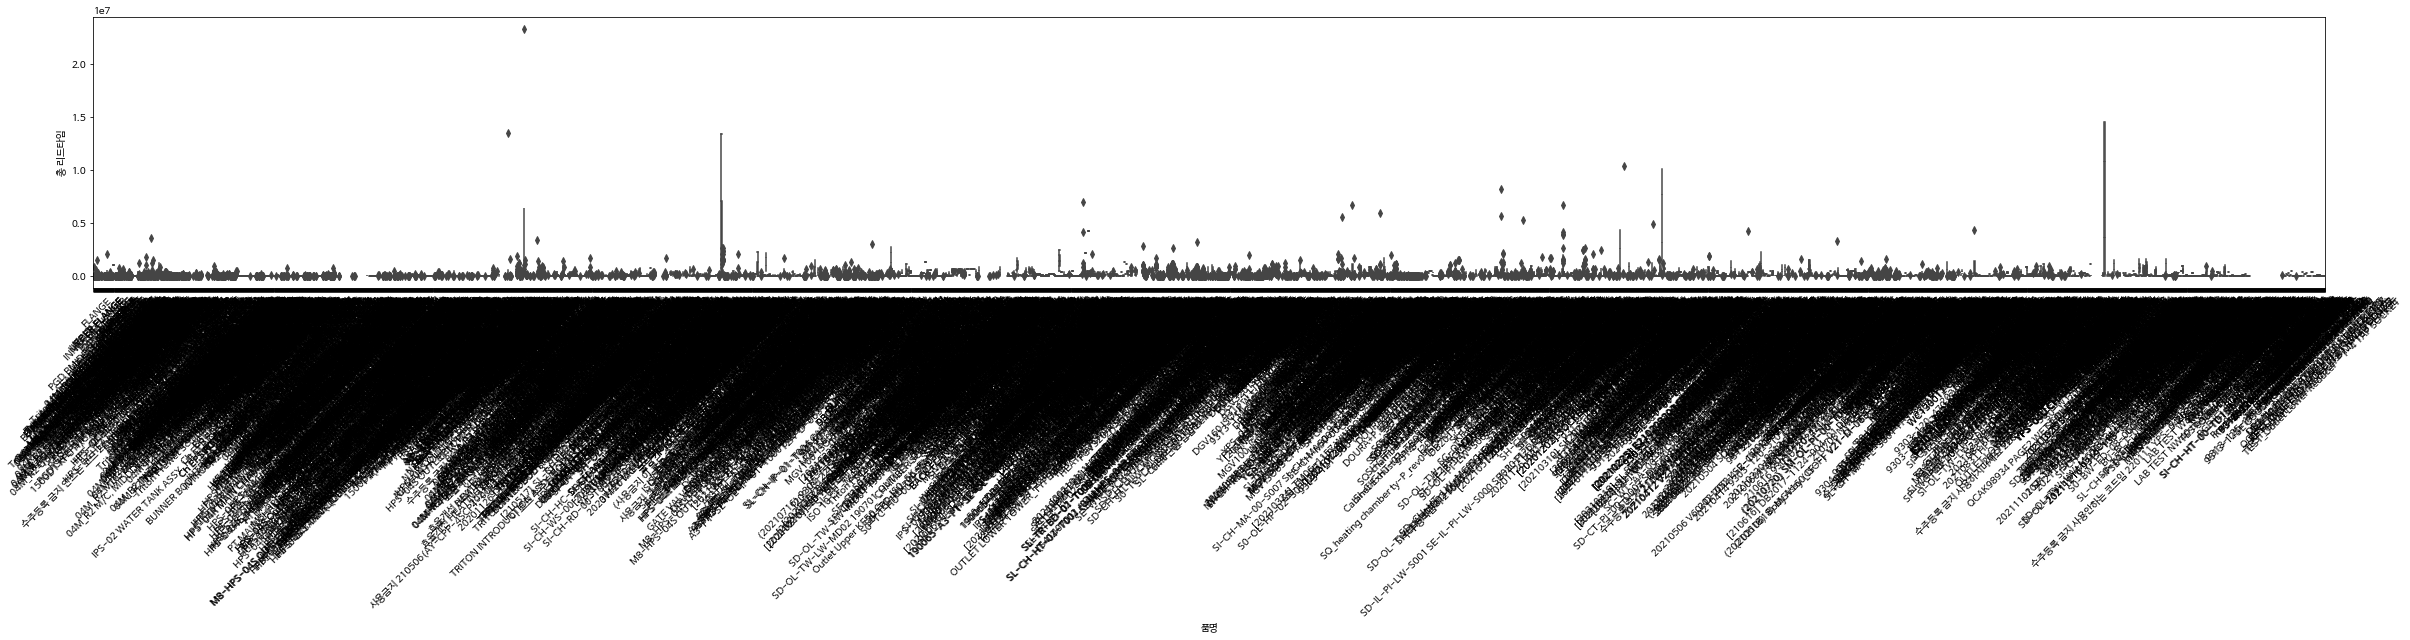

In [ ]:
# boxplot -> ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
sns.boxplot(x='품명', y='총 리드타임', data=df)
plt.show()

# 독립변수

# 날짜

- 이건 그냥 날짜별로 총 리드타임
- 총 생산량
- 총 입고량
- 

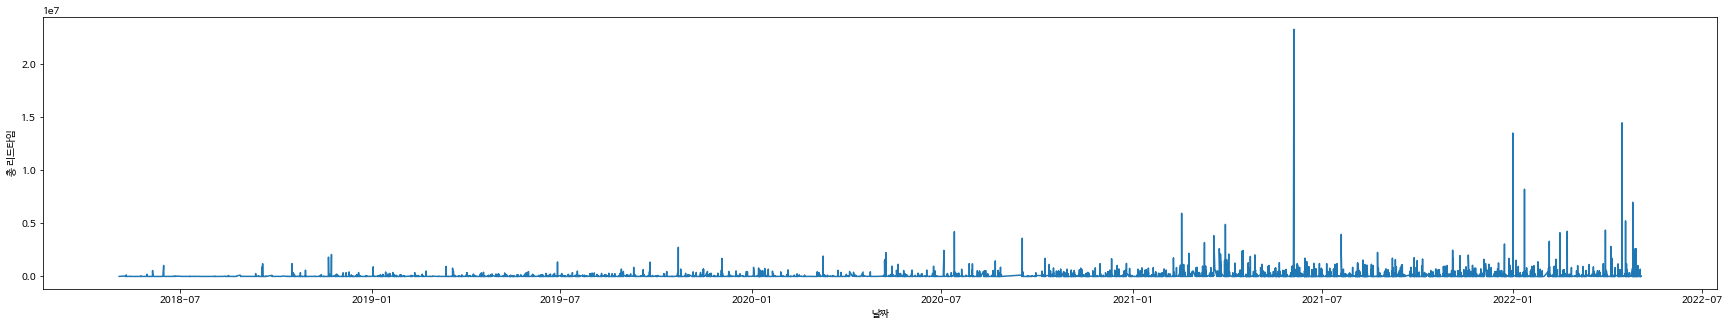

In [ ]:
plt.figure(figsize=(30, 5))
sns.lineplot(x="날짜", y="총 리드타임", data = df)
plt.show()

In [ ]:
df.columns

Index(['LOTID', '공정(번호)', '시차(초)', '개수', '총 리드타임', '날짜', '품명(코드화)', '품명',
       '전체공정'],
      dtype='object')

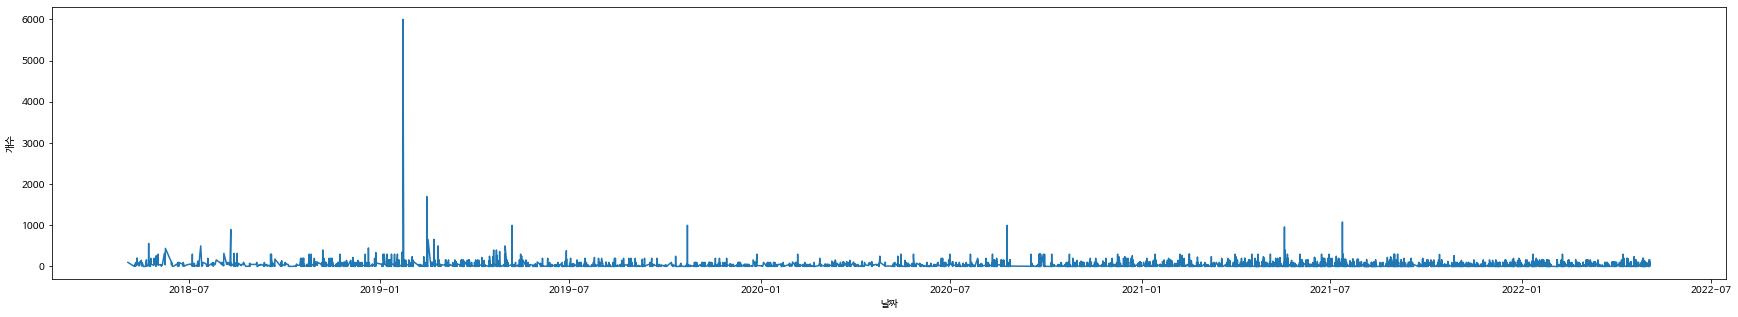

In [ ]:
plt.figure(figsize=(30, 5))
sns.lineplot(x="날짜", y="개수", data = df)
plt.show()

# 품명(정성)

1.
2.
3.
4.
5.
6.


In [ ]:
# 1. 품명(정량)
df["품명"].value_counts()

UPPER FLANGE                                                          468
UNDER FLANGE                                                          410
TOP FLANGE                                                            319
Bottom Flange                                                         288
BOTTOM FLANGE                                                         250
                                                                     ... 
RJ_Multi Chamber 3'st Ass'y                                             1
RJ_Multi Chamber Flange                                                 1
IPS-02 SUS TANK REV3 (VERTICAL PUMP MODIFY) [Z09170908STR3]             1
OUTLET LOWER TOWER_TYPE T PART 2 (DOUBLE CLAMP) [SD-OL-TW-LW-MD02]      1
Head Weld Assy Leck Test Jig                                            1
Name: 품명, Length: 6682, dtype: int64

In [ ]:
# 2. boxplot

'''
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
sns.boxplot(x='공정', y='품명', data=df)
plt.show()
'''

In [ ]:
# 3. pd.crosstab(df["공정"], df["갯수"])

'''
4. print(df[df.reality=='Y'].credit.describe())
print()
print(df[df.reality=='N'].credit.describe())
'''

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8709 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8709 missing from current font.
  font.set_text(s, 0, flags=flags)


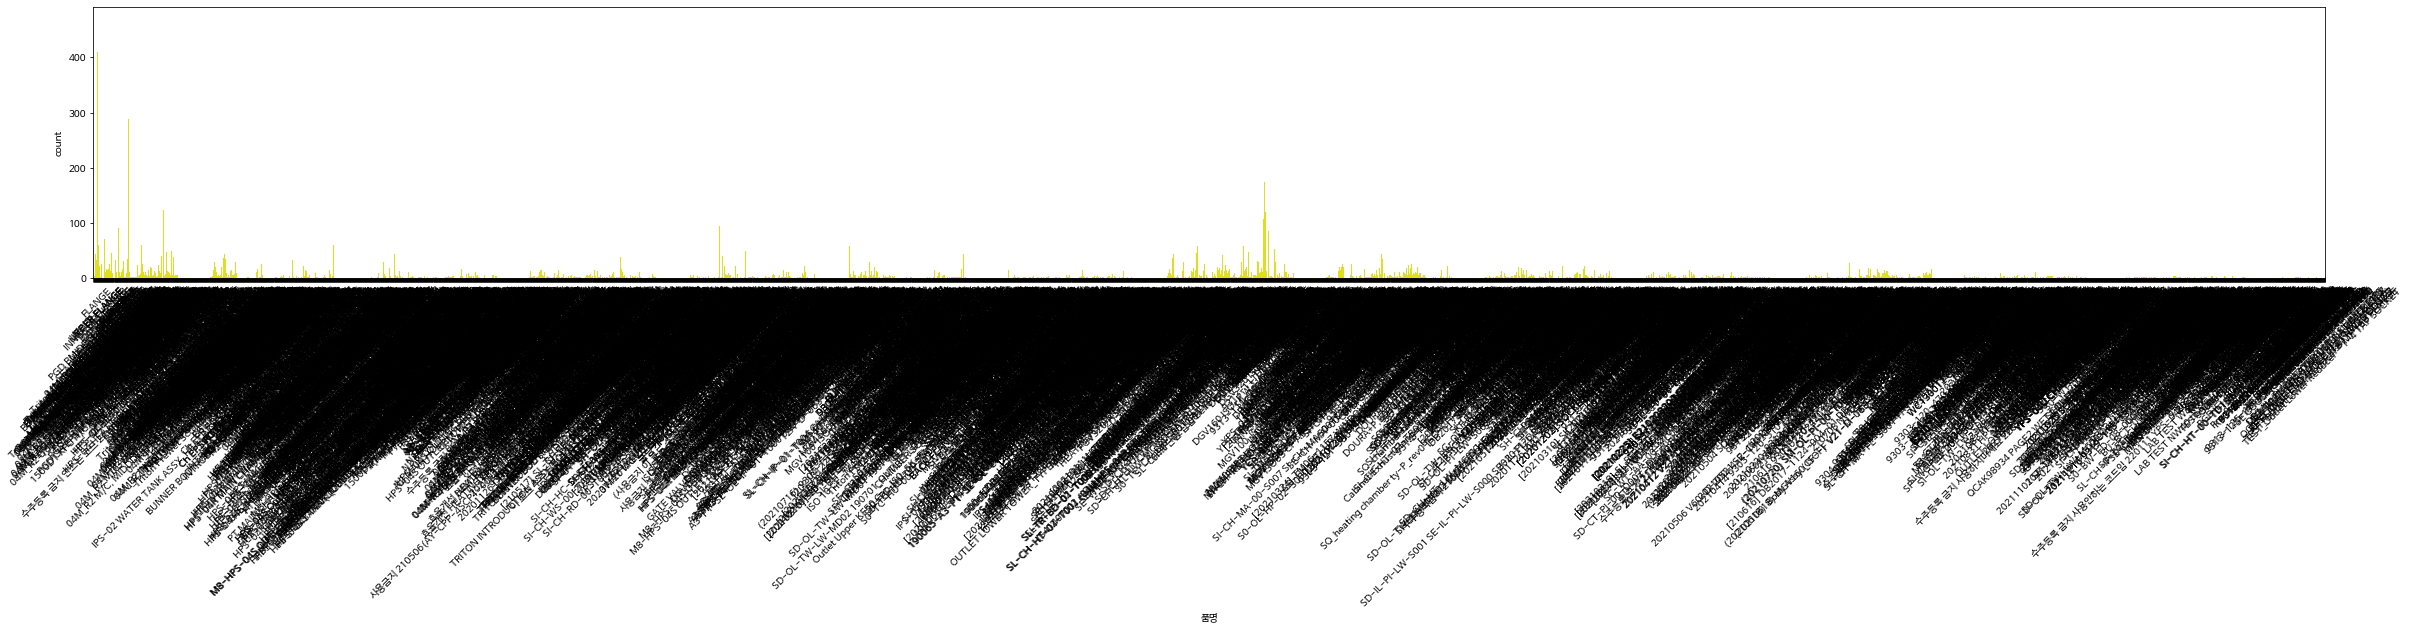

In [ ]:
# 범주형 데이터 

#barplot : 평균 그래프
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
sns.countplot(x = '품명', data=df, color = "yellow")
plt.show()

# 공정(정성)

- 내가 원하는 것 : 어떤 제품이 어떤 공정을 거치는데 그때 리드타임의 decribe -> 그러면 제품 별로 어떨때 리드타임 다르게 나오는지 볼 수 있지 않을까?

In [ ]:
df["전체공정"].value_counts() 

CNC > 세정 > 입고처리                        7092
용접 > 후처리 > 품질검사 > 입고처리                 6857
CNC > MCT > 세정 > 입고처리                  5423
MCT > 세정 > 입고처리                        3137
수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리        1706
                                       ... 
CNC > 용접 > CNC 2차 > MCT > 세정 > 입고처리       4
용접 > CNC > 세정 > 용접2차 > 입고처리               3
CNC > 외주가공 > 세정 > 입고처리                    3
MCT > 용접 > 입고처리                           3
용접 > CNC > 품질검사 > 입고처리                    3
Name: 전체공정, Length: 84, dtype: int64

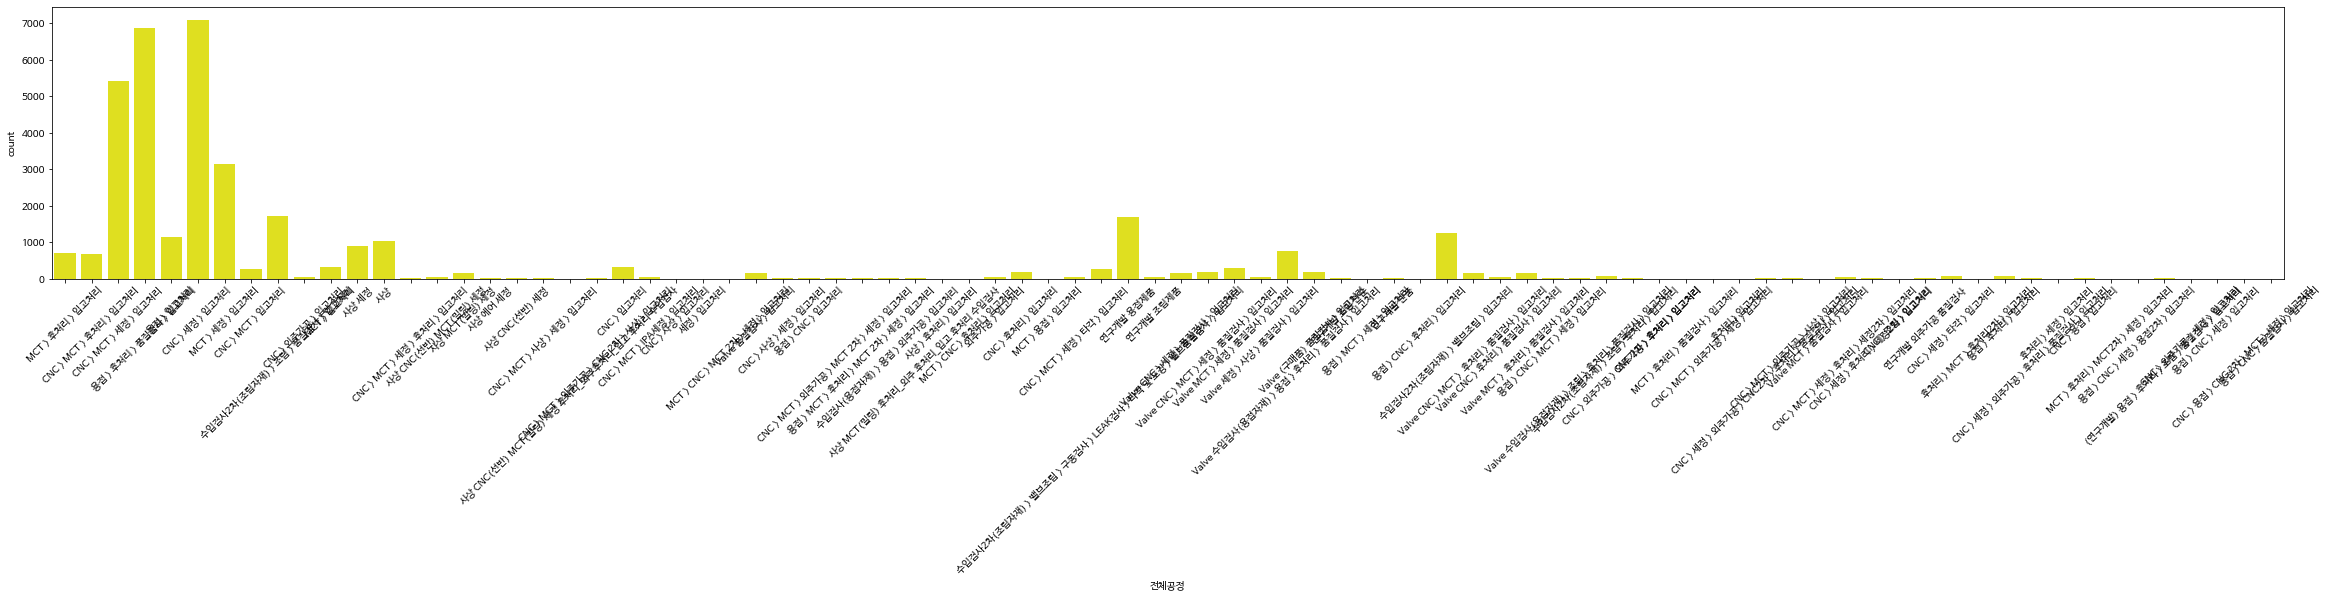

In [ ]:
# 범주형 데이터 

#barplot : 평균 그래프
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
sns.countplot(x = '전체공정', data=df, color = "yellow")
plt.show()

In [ ]:
arr = df["전체공정"].unique()
arr

array(['MCT > 후처리 > 입고처리', 'CNC > MCT > 후처리 > 입고처리',
       'CNC > MCT > 세정 > 입고처리', '용접 > 후처리 > 품질검사 > 입고처리', '용접 > 입고처리',
       'CNC > 세정 > 입고처리', 'MCT > 세정 > 입고처리', 'CNC > MCT > 입고처리',
       '수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리', 'CNC > 외주가공 > 입고처리',
       'MCT > 입고처리', '사상 세정', '사상', 'CNC > MCT > 세정 > 후처리 > 입고처리',
       '사상 CNC(선반) MCT(밀링) 세정', '사상 MCT(밀링) 세정', '사상 에어 세정',
       '사상 CNC(선반) 세정', 'CNC > MCT > 사상 > 세정 > 입고처리',
       '사상 CNC(선반) MCT(밀링) 세정 후처리_외주후처리_입고 후처리 수입검사',
       'CNC > MCT > 외주가공 > CNC 2차 > 사상 > 입고처리', 'CNC > 입고처리',
       'CNC > MCT > IPA세정 > 입고처리', 'CNC > 사상 > 입고처리', '세정 > 입고처리',
       'MCT > CNC > MCT 2차 > 세정 > 입고처리', 'Valve 품질검사 > 입고처리',
       'CNC > 사상 > 세정 > 입고처리', '용접 > CNC > 입고처리',
       'CNC > MCT > 외주가공 > MCT 2차 > 세정 > 입고처리',
       '용접 > MCT > 후처리 > MCT 2차 > 세정 > 입고처리',
       '수입검사(용접자재) > 용접 > 외주가공 > 입고처리',
       '사상 MCT(밀링) 후처리_외주 후처리_입고 후처리 수입검사', '사상 > 후처리 > 입고처리',
       'MCT > CNC > 후처리 > 입고처리', '외주가공 > 입고처리', 'CNC > 후처리 > 입고처리',
      

In [ ]:
for i in arr:
  print("전체공정 "+i)
  display(df[df["전체공정"] == i]["총 리드타임"].groupby(df["품명"]).describe())
  print('\n\n\n\n')

전체공정 MCT > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
150A PIPE 10SCH,6.0,11598.242500,25905.472472,6.000,140.46875,370.6700,3399.7025,64369.000
320 Front Frame,2.0,20.035000,0.749533,19.505,19.77000,20.0350,20.3000,20.565
40W Motor Bracket,1.0,265.665000,NaN,265.665,265.66500,265.6650,265.6650,265.665
"63 JON LINK, STS304",1.0,28.500000,NaN,28.500,28.50000,28.5000,28.5000,28.500
6404-150-100 BURNER BODY BRACKET #1,1.0,9693.000000,NaN,9693.000,9693.00000,9693.0000,9693.0000,9693.000
...,...,...,...,...,...,...,...,...
UPPER PLATE,7.0,15427.594286,22034.441655,139.000,157.41250,6398.0000,20928.4175,59284.500
Upper Hinge,2.0,67354.750000,59291.257156,25429.500,46392.12500,67354.7500,88317.3750,109280.000
V60-D-100-1-2-1533 Sol Block,1.0,6688.180000,NaN,6688.180,6688.18000,6688.1800,6688.1800,6688.180







전체공정 CNC > MCT > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
100A PIPE SCH10S,5.0,15818.334000,24174.235953,4.333333,238.000000,2815.113333,19441.723333,56592.500000
125A PIPE SCH10S,1.0,31628.166667,NaN,31628.166667,31628.166667,31628.166667,31628.166667,31628.166667
250 Bottom Blade(신형),1.0,342.000000,NaN,342.000000,342.000000,342.000000,342.000000,342.000000
"3WAY VALVE 63 ASSY, ROTOR LOWER SPACER, PTFE",1.0,17.000000,NaN,17.000000,17.000000,17.000000,17.000000,17.000000
"3WAY VALVE 63 ASSY, ROTOR, STS316L",1.0,56.000000,NaN,56.000000,56.000000,56.000000,56.000000,56.000000
...,...,...,...,...,...,...,...,...
UPPER ADAPTER,8.0,118624.270833,109004.837383,267.000000,61895.000000,94059.083333,159240.000000,329992.333333
V60-D-100-1-2-1532 Cylinder,1.0,7580.083333,NaN,7580.083333,7580.083333,7580.083333,7580.083333,7580.083333
Water Guide,1.0,371934.666667,NaN,371934.666667,371934.666667,371934.666667,371934.666667,371934.666667







전체공정 CNC > MCT > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
QCAK58656 STS304,1.0,41135.166667,NaN,41135.166667,41135.166667,41135.166667,41135.166667,41135.166667
"04M HEATING CHAMBER,SHOWER RING STS316L",22.0,4644.355758,4127.563686,8.386667,1259.677500,3949.430000,5637.180000,13303.016667
"04M HEATING CHAMBER,UPPER FLANGE STS316L",9.0,6159.760370,7876.139704,7.770000,2739.680000,4226.663333,5612.150000,26226.130000
04M-R2 SUS TANK CIR'OUT SOCKET TEFELON,3.0,4.180000,1.636891,2.773333,3.281667,3.790000,4.883333,5.976667
04M-R2 SUS TANK END SOCKET TEFELON,3.0,4.013333,1.781685,2.413333,3.053333,3.693333,4.813333,5.933333
...,...,...,...,...,...,...,...,...
"요소수 NOZZLE FAIRING ASSY, NOZZLE FAIRING-2, STS304",2.0,0.141667,0.002357,0.140000,0.140833,0.141667,0.142500,0.143333
"쿨링 타공판 ASSY, FLANGE-2 , STS303(자유)",15.0,3113.256667,6667.779339,1.083333,155.066667,294.663333,1577.220000,19993.666667
"쿨링 타공판 ASSY, TUBE, STS304",7.0,3781.735714,6568.048582,35.066667,163.591667,235.166667,4468.683333,16937.366667







전체공정 용접 > 후처리 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
9314-114-960 CYCLONE FAN,1.0,7.283417e+03,NaN,7.283417e+03,7.283417e+03,7.283417e+03,7.283417e+03,7.283417e+03
APS POWDER BODY 이중관_NW40,2.0,1.294946e+05,44758.091482,9.784588e+04,1.136702e+05,1.294946e+05,1.453190e+05,1.611434e+05
Inlet Bellows (160L),4.0,7.626569e+03,5136.111489,2.511200e+02,6.771580e+03,9.036847e+03,9.891836e+03,1.218146e+04
Main Chamber,3.0,2.602145e+05,391230.949120,9.142233e+02,3.520658e+04,6.949893e+04,3.898646e+05,7.102303e+05
NOZZLE PIPE(SPRAY)T001,2.0,9.786133e+04,138371.841571,1.766500e+01,4.893950e+04,9.786133e+04,1.467832e+05,1.957050e+05
...,...,...,...,...,...,...,...,...
투명 PVC Packed Tower,1.0,2.530783e+05,NaN,2.530783e+05,2.530783e+05,2.530783e+05,2.530783e+05,2.530783e+05
팬들럼 센서 헤드(신형) - W,1.0,1.533225e+04,NaN,1.533225e+04,1.533225e+04,1.533225e+04,1.533225e+04,1.533225e+04
효율개선 HEATING CHAMBER INNER TUBE ASSY-W,1.0,7.192500e+04,NaN,7.192500e+04,7.192500e+04,7.192500e+04,7.192500e+04,7.192500e+04







전체공정 용접 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
(20210427) SI-CH-HC-00-TD01 MW_Test Heating Chamber_Ty A,1.0,540831.000,NaN,540831.00,540831.0000,540831.000,540831.0000,540831.00
(20210427) SI-CH-MA-00-TD04 MW_Test Main Chamber_Ty C,2.0,314686.500,319793.991539,88558.00,201622.2500,314686.500,427750.7500,540815.00
(20210720) SM-OL-PI-00-T001 DeNOx Test_OUTLET PIPE T000,1.0,88556.000,NaN,88556.00,88556.0000,88556.000,88556.0000,88556.00
(20210720) SM-OL-PI-00-T001 DeNOx Test_OUTLET PIPE T001,1.0,88560.000,NaN,88560.00,88560.0000,88560.000,88560.0000,88560.00
(SK) NOZZLE DRAIN H BODY - W,2.0,765888.915,429289.596814,462335.33,614112.1225,765888.915,917665.7075,1069442.50
...,...,...,...,...,...,...,...,...
Weld Outlet-W,5.0,480417.484,222106.400040,153048.25,399323.5000,480447.670,675431.0000,693837.00
YPS-04U MAIN CHAMBER-1_2,1.0,90769.750,NaN,90769.75,90769.7500,90769.750,90769.7500,90769.75
석영관 HOLDER -1 용접도,1.0,414150.000,NaN,414150.00,414150.0000,414150.000,414150.0000,414150.00







전체공정 CNC > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
"04M HEATING CHAMBER,UNDER FLANGE STS316L",22.0,8305.430455,9161.627843,11.005,4316.39625,5340.8000,8620.45625,41274.200
04M-R2 SUS TANK NW40 FLANGE SUS304,2.0,4.457500,0.045962,4.425,4.44125,4.4575,4.47375,4.490
04M-R2 SUS TANK NW40 OVER FLOW FLANGE RING SUS304,2.0,6.185000,3.500179,3.710,4.94750,6.1850,7.42250,8.660
04M-R2 SUS TANK NW40 OVER FLOW FLANGE TEFLON,3.0,5.283333,1.743060,3.645,4.36750,5.0900,6.10250,7.115
04M-R2 SUS TANK WATER TANK NW40 FLANGE SUS304,2.0,6.862500,1.891511,5.525,6.19375,6.8625,7.53125,8.200
...,...,...,...,...,...,...,...,...
투시창 PIPE,23.0,2259.454783,4658.919201,7.625,48.41250,574.3500,1189.57500,15985.335
투시창 Pipe,1.0,136.500000,NaN,136.500,136.50000,136.5000,136.50000,136.500
"팬들럼 센서 헤드(신형), BODY-2, STS304",1.0,4.300000,NaN,4.300,4.30000,4.3000,4.30000,4.300







전체공정 MCT > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
"04M-R2 PGEM 음극 BLOCK REV2, 음극 BLOCK 황동",23.0,1440.086522,976.623224,0.910,895.01500,1363.7500,1887.12250,4380.775
04M-R2 SUS TANK WINDOW P.C 투명,15.0,2470.326000,3803.048475,5.305,210.16500,1269.7100,2887.67000,14997.835
04M-R2 SUS TANK Window P.C Cover,2.0,644.357500,905.531551,4.050,324.20375,644.3575,964.51125,1284.665
04M-R2 UTILITY SUPPORT #1 UNDER AL6061,15.0,1761.637000,1545.260364,2.855,403.72500,1364.1000,3065.42750,4851.635
04M-R2 UTILITY SUPPORT #1 UPPER AL6061,16.0,1647.023125,1565.058053,2.710,189.37500,1253.6450,2978.01500,4852.410
...,...,...,...,...,...,...,...,...
"쿨링 케이스 다리받침류, 베이스 판-2, STS304",7.0,252.342143,154.165509,37.000,164.30000,261.1250,332.83500,474.000
"쿨링 케이스 다리받침류, 베이스 판-3 부품, TFLF",5.0,259.167000,192.754866,54.300,104.70000,258.5000,344.33500,534.000
"쿨링 케이스 다리받침류, 베이스 판-3, STS304",6.0,262.742500,178.220282,37.100,147.92500,268.1875,336.59125,535.750







전체공정 CNC > MCT > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
250 Main Flange,1.0,4.769550e+02,NaN,4.769550e+02,4.769550e+02,4.769550e+02,4.769550e+02,4.769550e+02
ANODE (20K) 일체형 무산소동,9.0,2.038529e+03,2755.700382,4.715000e+00,1.972500e+02,1.255625e+03,2.206215e+03,8.818150e+03
BODY,4.0,2.325705e+03,2545.670940,1.432700e+02,1.447475e+02,2.100802e+03,4.281760e+03,4.957945e+03
BURNER BODY,13.0,3.807531e+04,94434.848719,7.000000e-02,1.404950e+02,4.331615e+03,3.612693e+04,3.476492e+05
BURNER BODY RING,5.0,3.463512e+04,72530.410148,2.317500e+01,1.405000e+02,1.405500e+02,8.659375e+03,1.642120e+05
BURNER HEAD,12.0,2.392172e+04,55718.654263,1.750000e-01,1.182581e+03,2.441745e+03,4.610084e+03,1.872398e+05
CATHODE,61.0,4.687577e+03,6161.820658,2.300000e-01,2.099850e+03,3.078880e+03,4.972850e+03,3.962979e+04
CATHODE FAIRING,3.0,1.182203e+03,202.480601,1.044190e+03,1.065980e+03,1.087770e+03,1.251210e+03,1.414650e+03
CATHODE NUT,2.0,2.384390e+03,1106.424123,1.602030e+03,1.993210e+03,2.384390e+03,2.775570e+03,3.166750e+03







전체공정 수입검사2차(조립자재) > 조립 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
(SK) NOZZLE DRAIN H BODY ASSY,1.0,48124.933333,NaN,48124.933333,48124.933333,48124.933333,48124.933333,4.812493e+04
(사용금지 이 코드 수주등록 하지마세요 210820)WATER TANK IPS-02,2.0,13770.500000,19454.157466,14.333333,6892.416667,13770.500000,20648.583333,2.752667e+04
04M-R2 SUS TANK ASSY REV 0.2,13.0,50212.111795,50097.842399,3649.446667,10018.886667,32378.400000,55932.200000,1.497210e+05
04U AUTO DAMPER (변경 모델),5.0,35975.760000,59400.722202,6299.093333,9210.666667,11063.430000,11128.610000,1.421770e+05
061 BURNER BODY,2.0,10514.065000,13838.643036,728.666667,5621.365833,10514.065000,15406.764167,2.029946e+04
...,...,...,...,...,...,...,...,...
인증 TANK 10L ASSY,1.0,67798.000000,NaN,67798.000000,67798.000000,67798.000000,67798.000000,6.779800e+04
쿨링 타공판,15.0,520095.739778,910021.084116,6832.000000,18129.500000,61663.666667,314578.278333,2.387369e+06
쿨링케이스-다리받침류,13.0,237654.234103,559730.797146,6833.330000,13669.443333,40947.000000,112968.333333,2.061487e+06







전체공정 CNC > 외주가공 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
DPV200 Protection Ring,4.0,665.512500,1.393284,663.910000,664.727500,665.477500,666.262500,667.185000
"Frame Screw, AL6061 하드아노다이징",4.0,27.901667,15.240605,10.080000,17.840000,29.838333,39.900000,41.850000
K-CATHODE 텅스텐,5.0,55593.850000,101753.469355,3.125000,29.500000,31.750000,43420.000000,234484.875000
"Piston,AL6061(White Anodizing)",3.0,3057.700000,5214.598841,46.150000,47.050000,47.950000,4563.475000,9079.000000
"SOCEKT, AL6061",1.0,27.500000,NaN,27.500000,27.500000,27.500000,27.500000,27.500000
"Support,AL6061 하드아노다이징",3.0,24.348889,14.859857,11.860000,16.131667,20.403333,30.593333,40.783333
구조용 사각형파이프 30*30*1.2T (290L),2.0,25200.500000,35409.786281,162.000000,12681.250000,25200.500000,37719.750000,50239.000000
구조용 사각형파이프 30*30*1.2T (598L),2.0,12599.625000,17703.655704,81.250000,6340.437500,12599.625000,18858.812500,25118.000000
분리형 FLANGE,30.0,30700.184611,61337.901297,1.576667,3145.281667,5251.380000,29163.212500,302534.933333







전체공정 MCT > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
04M-R2 SUS TANK WINDOW P.C 투명,11.0,12098.020000,30454.035712,5.18,983.6900,1915.710,5750.7650,103463.40
160 Main Flange,1.0,835.640000,NaN,835.64,835.6400,835.640,835.6400,835.64
170 SHAFT BRACKET,1.0,116713.500000,NaN,116713.50,116713.5000,116713.500,116713.5000,116713.50
170 SHAFT ENCODER BRACKET,1.0,113676.500000,NaN,113676.50,113676.5000,113676.500,113676.5000,113676.50
200 Main Flange,1.0,836.910000,NaN,836.91,836.9100,836.910,836.9100,836.91
...,...,...,...,...,...,...,...,...
UTILITY SUPPORT #2-4,2.0,5280.400000,166.311515,5162.80,5221.6000,5280.400,5339.2000,5398.00
UTILITY SUPPORT 1-1 (UPPER) 국내,2.0,2926.885000,3483.370639,463.77,1695.3275,2926.885,4158.4425,5390.00
UTILITY SUPPORT 1-2 (UNDER) 국내,2.0,4059.525000,1870.262081,2737.05,3398.2875,4059.525,4720.7625,5382.00







전체공정 사상 세정


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
"04M HEATING CHAMBER,OUT PIPE STS304",3.0,13.088333,2.152930,11.360,11.8825,12.405,13.9525,15.500
04M-R2 SUS TANK NW40 FLANGE PIPE SUS304,3.0,4.080000,0.246374,3.820,3.9650,4.110,4.2100,4.310
04M-R2 SUS TANK WATER TANK NW40 FLANGE PIPE SUS304,2.0,4.730000,2.071823,3.265,3.9975,4.730,5.4625,6.195
04M-R2 SUS TANK WATER TANK 상판 SUS304,3.0,2497.535000,4317.279645,3.965,4.9525,5.940,3744.3200,7482.700
04M-R2 SUS TANK Window P.C Cover,3.0,4.236667,1.541382,2.950,3.3825,3.815,4.8800,5.945
...,...,...,...,...,...,...,...,...
"요소수 NOZZLE ASSY, NOZZLE CAP -2, INCONEL600",1.0,260.150000,NaN,260.150,260.1500,260.150,260.1500,260.150
"요소수 NOZZLE ASSY, NOZZLE FAIRING -2, STS304",1.0,260.100000,NaN,260.100,260.1000,260.100,260.1000,260.100
"코일압축스프링,",1.0,3.805000,NaN,3.805,3.8050,3.805,3.8050,3.805







전체공정 사상


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
#15 Chain,2.0,66473.500,94004.331126,2.40,33237.9500,66473.500,99709.0500,132944.60
"04M HEATING CHAMBER,IN PIPE STS310S",5.0,7101.416,15842.768838,3.33,4.4200,6.730,50.8000,35441.80
04M-R2 SUS TANK BODY MIDDLE LEG SUS304,2.0,3.090,1.074802,2.33,2.7100,3.090,3.4700,3.85
04M-R2 SUS TANK BODY PARTITION WALL 1-1 SUS304,2.0,3.160,0.777817,2.61,2.8850,3.160,3.4350,3.71
04M-R2 SUS TANK BODY PARTITION WALL 1-2 SUS304,2.0,2.775,0.091924,2.71,2.7425,2.775,2.8075,2.84
...,...,...,...,...,...,...,...,...
Washer Bearing Fixer,1.0,0.210,NaN,0.21,0.2100,0.210,0.2100,0.21
모터 평행키,1.0,9.000,NaN,9.00,9.0000,9.000,9.0000,9.00
배관용 PIPE SUS304,1.0,0.930,NaN,0.93,0.9300,0.930,0.9300,0.93







전체공정 CNC > MCT > 세정 > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Bellows Cap,1.0,15141.1525,NaN,15141.1525,15141.152500,15141.1525,15141.15250,15141.1525
"DGV125 One Body(Manual), Bellows Supporter AL6061,경질국방",1.0,3415.8500,NaN,3415.8500,3415.850000,3415.8500,3415.85000,3415.8500
"DGV125 One Body(Manual), Screw Supporter AL6061,경질국방",1.0,1642.2475,NaN,1642.2475,1642.247500,1642.2475,1642.24750,1642.2475
N2 CURTAIN FLANGE 하부,10.0,19504.0420,15010.643149,22.7250,9095.723125,14328.3750,33194.27500,41812.1000
Triton Prewet Scraper FLANGE SUS 304,2.0,22951.8745,29263.613432,2259.3750,12605.624750,22951.8745,33298.12425,43644.3740







전체공정 사상 CNC(선반) MCT(밀링) 세정


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
04M-R2 SUS TANK WATER TANK BODY UPPER FLANGE SUS304,2.0,3.441250,1.118996,2.6500,3.045625,3.44125,3.836875,4.2325
04M-R2 SUS TANK WATER TANK 상판 WINDOW FLANGE SUS304,3.0,21617.515000,37436.922884,2.5025,3.297500,4.09250,32425.021250,64845.9500
04M-R2 SUS TANK WINDOW FLANGE SUS304,2.0,2.292500,0.410122,2.0025,2.147500,2.29250,2.437500,2.5825
04M-R2 SUS TANK 상판 WINDOW FLANGE(5T) SUS304,3.0,2.687500,2.094891,1.1125,1.498750,1.88500,3.475000,5.0650
04M-R2 SUS Tank Vertical Pump Flange-10T STS304,4.0,29902.234375,59590.540959,2.6450,3.674375,159.25875,30057.818750,119287.7750
04M-R2 SUS Tank Vertical Pump Flange-3T STS304,4.0,5660.481250,11298.496101,2.7075,3.950625,15.50000,5672.030625,22608.2175
640 Triton Prewet Scraper SHAFT-1,4.0,2.817500,1.893335,1.8675,1.871250,1.87250,2.818750,5.6575
"DGV125 One Body, Top_Blade STS304",3.0,1328.340000,1364.116933,5.8000,627.238750,1248.67750,1989.610000,2730.5425
INCONEL FLANGE(TEST),1.0,0.525000,NaN,0.5250,0.525000,0.52500,0.525000,0.5250







전체공정 사상 MCT(밀링) 세정


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
04M-R2 SUS TANK BODY UPPER FLANGE SUS304,2.0,2.721667,0.403051,2.436667,2.579167,2.721667,2.864167,3.006667
04M-R2 SUS TANK 상판 WINDOW FLANGE SUS304,3.0,3.265556,2.405744,1.446667,1.901667,2.356667,4.175000,5.993333
04M-R2 SUS Tank 상판 WINDOW FLANGE(10T) STS304,4.0,3.038333,2.393569,1.576667,1.581667,1.998333,3.455000,6.580000
240 BURNER NOZZLE,1.0,32836.416667,NaN,32836.416667,32836.416667,32836.416667,32836.416667,32836.416667
250 Body Plate,3.0,5337.870000,8380.457739,0.390000,508.305000,1016.220000,8006.610000,14997.000000
250 Bottom Spring,1.0,24146.900000,NaN,24146.900000,24146.900000,24146.900000,24146.900000,24146.900000
250 Front Frame,1.0,0.390000,NaN,0.390000,0.390000,0.390000,0.390000,0.390000
250 Rib-1,2.0,3749.350000,5301.745224,0.450000,1874.900000,3749.350000,5623.800000,7498.250000
250 Rib-2,3.0,1335.542222,2096.040323,0.373333,127.625000,254.876667,2003.126667,3751.376667







전체공정 사상 에어 세정


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
GUIDE INCONEL600,4.0,132790.18750,154099.825561,119.000,640.77500,120705.6250,252855.0375,289630.500
PUSH SHAFT FLANGE SUS304,1.0,0.99500,NaN,0.995,0.99500,0.9950,0.9950,0.995
UPPER FLANGE INCONEL600,4.0,327044.57375,586003.578855,61.000,626.34625,52571.2725,378989.5000,1202974.750







전체공정 사상 CNC(선반) 세정


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
640 Triton Prewet Scraper BLADE-1,1.0,2999.940000,NaN,2999.940000,2999.940000,2999.940000,2999.940000,2999.940000
BURNER PLATE,1.0,5.750000,NaN,5.750000,5.750000,5.750000,5.750000,5.750000
BURNER PLATE SS41,1.0,6.890000,NaN,6.890000,6.890000,6.890000,6.890000,6.890000
UNDER FLANGE,1.0,4.566667,NaN,4.566667,4.566667,4.566667,4.566667,4.566667
열차단 PLATE SS41,8.0,1049.986458,2171.828234,0.485000,6.434167,93.733333,823.331667,6318.870000







전체공정 CNC > MCT > 사상 > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
"04M_R2 M/C, MIDDDLE BODY PIPE SEAMLESS PIPE Sch40s sts310s",3.0,1986.988333,3431.038209,6.0400,6.0775,6.115,2977.4625,5948.8100
"BUNNER BODY ASSY-W2, BUNNER SADDLE FLANGE, FLANGE STS04",3.0,4831.570000,4455.337721,0.6650,2857.8800,5715.095,7247.0225,8778.9500
BURNER NOZZLE END PLATE SUS310S,1.0,5.040000,NaN,5.0400,5.0400,5.040,5.0400,5.0400
BURNER SUPPORTER SUS310S,9.0,7946.589167,19357.386103,3.4375,22.3250,372.875,2990.3050,59267.1575
HOT N2 GUN BODY SUS304,1.0,0.495000,NaN,0.4950,0.4950,0.495,0.4950,0.4950
HOT N2 GUN BODY SUS304 구조관 PIPE,1.0,0.475000,NaN,0.4750,0.4750,0.475,0.4750,0.4750
SCRAPER VERTICAL BLADE,5.0,1204.771000,1283.526976,0.4850,0.4925,1331.035,1614.9000,3076.9425
SHAFT WING PART,1.0,8252.500000,NaN,8252.5000,8252.5000,8252.500,8252.5000,8252.5000
Triton Scraper Super Gear1 SCM 420H,1.0,5.350000,NaN,5.3500,5.3500,5.350,5.3500,5.3500







전체공정 사상 CNC(선반) MCT(밀링) 세정 후처리_외주후처리_입고 후처리 수입검사


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
BURNER HEAD FLANGE FC,4.0,90141.452083,180107.180406,5.133333,6.227083,129.254167,90264.479167,360302.166667







전체공정 CNC > MCT > 외주가공 > CNC 2차 > 사상 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
"H2 SCRAPER-ASSY, SPUR GEAR1, SCM 420H",2.0,7061.268333,9984.614094,1.08,3531.174167,7061.268333,10591.362500,14121.456667
INNER PIPE LOWER,1.0,16760.620000,NaN,16760.62,16760.620000,16760.620000,16760.620000,16760.620000
INNER PIPE UPPER,3.0,13212.145556,3127.973566,10854.36,11437.915000,12021.470000,14391.038333,16760.606667
SPUR GEAR2,2.0,5289.330000,670.209949,4815.42,5052.375000,5289.330000,5526.285000,5763.240000
Triton Scraper Super Gear1 SCM 420H,2.0,7372.441667,10393.326527,23.25,3697.845833,7372.441667,11047.037500,14721.633333







전체공정 CNC > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
14t Peek Bush,1.0,2.750000,NaN,2.750,2.75000,2.750,2.75000,2.750
20220203 GC사 BURNER WELD JIG -1,1.0,2167.600000,NaN,2167.600,2167.60000,2167.600,2167.60000,2167.600
20220331 GC사 BURNER WELD JIG-1,1.0,712.000000,NaN,712.000,712.00000,712.000,712.00000,712.000
20220331 GC사 BURNER WELD JIG-2,1.0,832.600000,NaN,832.600,832.60000,832.600,832.60000,832.600
20220331 GC사 BURNER WELD JIG-3,1.0,736.200000,NaN,736.200,736.20000,736.200,736.20000,736.200
8t Igus Bush,1.0,1.920000,NaN,1.920,1.92000,1.920,1.92000,1.920
ANODE,69.0,15419.283188,31171.695252,0.660,88.60000,5346.980,11910.90000,170131.330
ANODE (20K) 일체형 무산소동,1.0,21148.115000,NaN,21148.115,21148.11500,21148.115,21148.11500,21148.115
ANODE BUSH,1.0,417.570000,NaN,417.570,417.57000,417.570,417.57000,417.570







전체공정 CNC > MCT > IPA세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
"Bottom Blade,STS304",1.0,27.766667,NaN,27.766667,27.766667,27.766667,27.766667,27.766667
CATHODE,14.0,9039.776190,9961.596226,2.433333,2170.945000,5130.151667,15516.966667,35219.126667
"DGV125 One Body, Bottom_Blade STS304",1.0,6630.516667,NaN,6630.516667,6630.516667,6630.516667,6630.516667,6630.516667
MIDDLE BLADE STS304,1.0,20376.400000,NaN,20376.400000,20376.400000,20376.400000,20376.400000,20376.400000
MIDDLE TORCH ANODE 무산소동,9.0,6278.176667,5226.715188,2539.175000,3047.270000,5233.827500,5672.995000,19325.090000
MIDDLE TORCH CATHODE 무산소동,3.0,2177.558889,1294.115369,881.660000,1531.396667,2181.133333,2825.508333,3469.883333
N2 CURTAIN FLANGE ASSY 2 -상부STS304,1.0,1.140000,NaN,1.140000,1.140000,1.140000,1.140000,1.140000
N2 CURTAIN FLANGE ASSY 2 -하부 STS304,1.0,1.305000,NaN,1.305000,1.305000,1.305000,1.305000,1.305000
N2 CURTAIN FLANGE ASSY 3 -상부STS304,1.0,1.172500,NaN,1.172500,1.172500,1.172500,1.172500,1.172500







전체공정 CNC > 사상 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
BELLOWS,2.0,48.2775,63.211811,3.580,25.92875,48.2775,70.62625,92.975
BURNER BOTTOM FLANGE,1.0,638.3000,NaN,638.300,638.30000,638.3000,638.30000,638.300
BURNER SQUARE FLANGE 2,1.0,898.2000,NaN,898.200,898.20000,898.2000,898.20000,898.200
TUBE SUS316,3.0,1.4700,0.162096,1.325,1.38250,1.4400,1.54250,1.645







전체공정 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
BURNER UNDER FLANGE 스터드 BOLT SUS 304,1.0,0.87,NaN,0.87,0.87,0.87,0.87,0.87
ELBOW SUS304,1.0,2.53,NaN,2.53,2.53,2.53,2.53,2.53
UNDER REDUCER,1.0,2402.03,NaN,2402.03,2402.03,2402.03,2402.03,2402.03
UPPER REDUCER,1.0,2401.83,NaN,2401.83,2401.83,2401.83,2401.83,2401.83







전체공정 MCT > CNC > MCT 2차 > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
BURNER SQUARE FLANGE 1,3.0,3869.641667,4808.246314,524.125,1114.6125,1705.100,5542.4,9379.700
Triton Ch Slid Point SUS 304,2.0,1.675000,0.353553,1.425,1.5500,1.675,1.8,1.925







전체공정 Valve 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
"210408 MCK1I0211055 1/2인치"" Bulkhead 풀림 방지 Bracket",1.0,38.000,NaN,38.00,38.0000,38.000,38.0000,38.00
240 BURNER NOZZLE,5.0,9976.776,9661.737287,1.70,7.5000,13978.800,13984.8000,21911.08
240 BURNER NOZZLE END PLATE,4.0,18534.375,37033.085155,6.50,11.5250,23.500,18546.3500,74084.00
3단 클램프,2.0,5.415,4.122433,2.50,3.9575,5.415,6.8725,8.33
5277-900-080 SLIDE GUIDE,1.0,2536.970,NaN,2536.97,2536.9700,2536.970,2536.9700,2536.97
...,...,...,...,...,...,...,...,...
Washer Bearing Fixer,1.0,1436.590,NaN,1436.59,1436.5900,1436.590,1436.5900,1436.59
사용금지 쓰지마세요 211103 HEATING CHAMBER UPPER-REV1.2 ASSY,1.0,63241.400,NaN,63241.40,63241.4000,63241.400,63241.4000,63241.40
수주등록 금지 안쓰는 코드 22.01.20 ATOM1000(S) CATHODE NUT,1.0,1.810,NaN,1.81,1.8100,1.810,1.8100,1.81







전체공정 CNC > 사상 > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
"04M HEATING CHAMBER,CAP NUT",2.0,335.641667,444.819663,21.106667,178.374167,335.641667,492.909167,650.176667
"04M HEATING CHAMBER,SUS TUBE",3.0,330.346667,557.249822,8.566667,8.618333,8.670000,491.236667,973.803333
"04M_R2 M/C, MIDDDLE BODY 밴딩 PIPE SEAMLESS PIPE Sch10s STS316L",6.0,15.808889,23.288448,1.303333,4.426667,9.318333,9.335000,62.776667
"ATTACHMENT BLOCK(28.5T), STS304",1.0,7.333333,NaN,7.333333,7.333333,7.333333,7.333333,7.333333
"ATTACHMENT BLOCK, STS304",1.0,6.880000,NaN,6.880000,6.880000,6.880000,6.880000,6.880000
BELLOWS TUBE,1.0,0.810000,NaN,0.810000,0.810000,0.810000,0.810000,0.810000
CAP NUT (가공품),1.0,8.020000,NaN,8.020000,8.020000,8.020000,8.020000,8.020000
ELBOW CONNECTOR,1.0,8.673333,NaN,8.673333,8.673333,8.673333,8.673333,8.673333
SEAMLESS PIPE 32A Sch10s,1.0,0.076667,NaN,0.076667,0.076667,0.076667,0.076667,0.076667







전체공정 용접 > CNC > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Bottom Blade w,1.0,305241.666667,NaN,305241.666667,305241.666667,305241.666667,305241.666667,305241.666667
CH EPS ROTATION SHAFT ASSY-W,3.0,62537.886667,37553.439377,19174.910000,51697.080000,84219.250000,84219.375000,84219.500000
PGD CH EPS(A) ASS'Y-W,1.0,69.066000,NaN,69.066000,69.066000,69.066000,69.066000,69.066000
PGD CH EPS(B) ASS'Y-W,1.0,69.268000,NaN,69.268000,69.268000,69.268000,69.268000,69.268000
QCAK59325 E2 Under Liner,2.0,65923.625000,92098.713706,800.000000,33361.812500,65923.625000,98485.437500,131047.250000
QCAK59327 ASSY,1.0,801.600000,NaN,801.600000,801.600000,801.600000,801.600000,801.600000
SQ-inner pipe std-ty p,3.0,107686.230000,98169.617976,536.500000,64879.470000,129222.440000,161261.095000,193299.750000
Teflon MF100 Bellows Guide-1,1.0,5.600000,NaN,5.600000,5.600000,5.600000,5.600000,5.600000
Teflon MF40 Bellows Guide,1.0,5.600000,NaN,5.600000,5.600000,5.600000,5.600000,5.600000







전체공정 CNC > MCT > 외주가공 > MCT 2차 > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
RATCHET BLOCK-2,4.0,16993.901500,23657.109075,653.83,4889.494000,7610.721,19715.128500,52100.334
SPUR GEAR NUT,4.0,10387.168000,10399.957847,490.33,4848.469000,8096.971,13635.670000,24864.400
Triton Scraper Super Gear1 SCM 420H,18.0,216132.224398,845911.223673,0.97,2466.090167,7520.321,16340.650625,3603810.000







전체공정 용접 > MCT > 후처리 > MCT 2차 > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
DGV125 One Body(Slow Pump) Bonnet-W,2.0,7.466460e+03,9.794362e+03,540.800000,4003.630000,7.466460e+03,1.092929e+04,1.439212e+04
"ISO-F 320P ASSY, BACK COVER ASSY-W",2.0,4.933177e+05,4.409840e+05,181494.900000,337406.275000,4.933177e+05,6.492290e+05,8.051404e+05
"MGV 100, BACK COVER ASSY",1.0,2.400476e+05,NaN,240047.600000,240047.600000,2.400476e+05,2.400476e+05,2.400476e+05
"MGV100_CF,Back Cover Ass'y-W",2.0,7.053336e+04,4.737494e+04,37034.221667,53783.791250,7.053336e+04,8.728293e+04,1.040325e+05
"PGV100_CF (GV0400PVCF), Back Cover Ass'y-W",5.0,8.599223e+04,3.451307e+04,46168.000000,50866.418333,1.040323e+05,1.144405e+05,1.144539e+05
"PGV100_ISO-F(Sensor), Back Cover Ass'y-W",1.0,5.203564e+04,NaN,52035.644000,52035.644000,5.203564e+04,5.203564e+04,5.203564e+04
"PGV160_CFM (GV0600PVCFM),Main Link Ass'y-W",3.0,1.351580e+05,2.207299e+05,3020.025000,7748.789167,1.247755e+04,2.012270e+05,3.899765e+05
PGV160_ISO-K Back Cover Ass'y-W,2.0,1.041538e+06,9.635205e+05,360226.500000,700882.425000,1.041538e+06,1.382194e+06,1.722850e+06
"PGV160_ISO_F,Back Cover Ass'y-W",2.0,8.583295e+04,4.301685e+04,55415.443333,70624.195000,8.583295e+04,1.010417e+05,1.162504e+05







전체공정 수입검사(용접자재) > 용접 > 외주가공 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
DGV125 One BodySlow Pump) Bottom Blade-W,7.0,6335.782500,7847.429304,607.50,3623.88250,4206.08500,4206.16875,23876.79
DGV125 One BodySlow Pump) Top_Blade-W,6.0,4497.484167,2866.425591,610.25,4203.67625,4203.73875,4203.78625,9559.72







전체공정 사상 MCT(밀링) 후처리_외주 후처리_입고 후처리 수입검사


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
ROTATION LINK SUS304,1.0,0.585000,NaN,0.585000,0.585000,0.585000,0.585000,0.585000
Triton Prewet Scraper BRACKET SUS 304,4.0,8068.049583,11498.571093,0.235000,0.261250,3940.498333,12008.286667,24390.966667
Triton Scraper Bar SUS 304,11.0,7632.299242,7172.653727,0.142500,1099.083333,6017.070000,11252.203333,20180.576667
Triton Scraper Cover SUS 304,1.0,5.433333,NaN,5.433333,5.433333,5.433333,5.433333,5.433333







전체공정 사상 > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
ROTATION LINK,1.0,5.580000,NaN,5.580000,5.58000,5.5800,5.5800,5.580000
Triton Scraper motor Braket SUS 304,6.0,3023.245278,1605.931506,640.193333,2108.69125,3192.6125,4094.5125,4971.523333







전체공정 MCT > CNC > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
"CHAIN BELLOWS BRACKET ASSY, RING, AL6061",5.0,1487.330333,910.060048,0.123333,1473.276667,1724.040000,1769.406667,2469.805000
RING,2.0,1070.246667,1509.503272,2.866667,536.556667,1070.246667,1603.936667,2137.626667







전체공정 외주가공 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
5277-900-120 LM GUIDE BLOCK,2.0,4.000000,0.000000,4.000,4.00000,4.0000,4.00000,4.00
5319-130-180 (코팅: FEP300um) 제품: 9303-119-130,1.0,5.000000,NaN,5.000,5.00000,5.0000,5.00000,5.00
5319-131-700 (코팅: PFA300um) 제품: 9304-149-160,1.0,14.000000,NaN,14.000,14.00000,14.0000,14.00000,14.00
6414-196-150 SPUR GEAR1 SHAFT,15.0,13710.850667,30887.093496,0.830,6.53500,283.1000,9027.43500,112181.95
CATHODE 텅스텐,3.0,1.253333,1.859175,0.160,0.18000,0.2000,1.80000,3.40
CH SLID WORM SHAFT,1.0,12467.180000,NaN,12467.180,12467.18000,12467.1800,12467.18000,12467.18
COVER 1,5.0,125104.874000,181792.270083,57.170,67.40000,16865.8000,192444.40000,416089.60
COVER 2,5.0,125102.720000,181792.780185,55.000,64.80000,16863.0000,192442.60000,416088.20
COVER 3,5.0,64236.386000,89712.105863,25.830,31.60000,16861.0000,96220.30000,208043.20







전체공정 CNC > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
1 Inch WELD CAP,3.0,359231.530000,579718.592660,23035.230000,24531.960000,26028.690000,527329.680000,1.028631e+06
100A PIPE SCH10S,1.0,47440.700000,NaN,47440.700000,47440.700000,47440.700000,47440.700000,4.744070e+04
125A PIPE SCH10S,1.0,47439.350000,NaN,47439.350000,47439.350000,47439.350000,47439.350000,4.743935e+04
20A PIPE L=45,1.0,508.000000,NaN,508.000000,508.000000,508.000000,508.000000,5.080000e+02
20A PIPE-1,1.0,176764.130000,NaN,176764.130000,176764.130000,176764.130000,176764.130000,1.767641e+05
20A PIPE-2,1.0,176760.065000,NaN,176760.065000,176760.065000,176760.065000,176760.065000,1.767601e+05
32A PIPE SCH10S-1,1.0,11861.090000,NaN,11861.090000,11861.090000,11861.090000,11861.090000,1.186109e+04
"3WAY VALVE 63 ASSY, CYLIDER BRACKET, AL6061",1.0,40.335000,NaN,40.335000,40.335000,40.335000,40.335000,4.033500e+01
"63 CYLINDER BLOCK, AL6061",1.0,16.500000,NaN,16.500000,16.500000,16.500000,16.500000,1.650000e+01







전체공정 MCT > 용접 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
I-F-90064-3-14 Back Cover,1.0,61974.0000,NaN,61974.0000,61974.0000,61974.0000,61974.0000,61974.0000
Outslde Pipe,1.0,0.3675,NaN,0.3675,0.3675,0.3675,0.3675,0.3675
TOP FLANGE,1.0,0.3500,NaN,0.3500,0.3500,0.3500,0.3500,0.3500







전체공정 CNC > MCT > 세정 > 타각 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
150A PIPE SCH10,6.0,12958.781250,17529.617230,77.9375,399.076875,3442.42000,25584.931250,38439.5125
Bottom Flange,13.0,50318.534615,61590.343232,4163.1000,11515.562500,15355.40000,66979.000000,174376.3500
Inlet Connection Body,1.0,74955.250000,NaN,74955.2500,74955.250000,74955.25000,74955.250000,74955.2500
Inside Pipe,6.0,12542.033750,9252.606308,3.7500,5212.270625,16433.41375,19529.420625,20348.3125
OD101.6 PIPE 구조관,6.0,5089.250833,6307.139278,80.0000,353.537500,3372.81125,6927.892500,16249.8500
OutSide Pipe,5.0,122.907500,237.346067,2.2850,8.800000,14.00000,42.875000,546.5775
TOP FLANGE,17.0,35150.137059,48882.864922,1.2000,4725.500000,12940.75000,42753.275000,174376.6250







전체공정 수입검사2차(조립자재) > 밸브조립 > 구동검사 > LEAK검사 > 타각 및 포장 > 밸브품질검사  > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Control Box PART,1.0,3174.064286,NaN,3174.064286,3174.064286,3174.064286,3174.064286,3174.064286
DDV50(S) VALVE,1.0,100286.166667,NaN,100286.166667,100286.166667,100286.166667,100286.166667,100286.166667
DDV63 SLOW PUMPING VALVE,1.0,159024.666667,NaN,159024.666667,159024.666667,159024.666667,159024.666667,159024.666667
DDV63 Solenoid Type,1.0,12850.166667,NaN,12850.166667,12850.166667,12850.166667,12850.166667,12850.166667
DDV63(S) VALVE,2.0,214758.791667,185359.969886,83689.500000,149224.145833,214758.791667,280293.437500,345828.083333
...,...,...,...,...,...,...,...,...
Manual Direct Valve_40A_UHV,1.0,19903.250000,NaN,19903.250000,19903.250000,19903.250000,19903.250000,19903.250000
Manual Direct Valve_63A_UHV,1.0,19904.916667,NaN,19904.916667,19904.916667,19904.916667,19904.916667,19904.916667
Pendulum DPV 200-V1 Assy,2.0,3137.124286,0.062629,3137.080000,3137.102143,3137.124286,3137.146429,3137.168571







전체공정 연구개발 용접제품


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
123,5.0,264025.626667,139475.300054,34163.300000,240172.666667,304245.500000,370759.000000,370787.666667
(S4120203) - OUTLET Lower Tower (AY-OLT-S0203-00-1) HPS-04,1.0,170481.890000,NaN,170481.890000,170481.890000,170481.890000,170481.890000,170481.890000
240 SCRAPER Ass'y,1.0,278734.666667,NaN,278734.666667,278734.666667,278734.666667,278734.666667,278734.666667
9319-107-540 HEAT WET SCRAPER ASS`Y,1.0,37875.333333,NaN,37875.333333,37875.333333,37875.333333,37875.333333,37875.333333
DB Manifold HEATER CAP 1 REV2.0,2.0,4834.935000,1246.711751,3953.376667,4394.155833,4834.935000,5275.714167,5716.493333
...,...,...,...,...,...,...,...,...
청안 관로형 6구 소독기,1.0,323877.500000,NaN,323877.500000,323877.500000,323877.500000,323877.500000,323877.500000
펜들림 센서 헤드 고온용(DS2010-06-002),1.0,51392.500000,NaN,51392.500000,51392.500000,51392.500000,51392.500000,51392.500000
폐가스 분리장치 센터링 65.23 2T,1.0,15.812500,NaN,15.812500,15.812500,15.812500,15.812500,15.812500







전체공정 연구개발 조립제품


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
(20211012) DB 3Way Valve 4,1.0,1.589140e+05,NaN,1.589140e+05,1.589140e+05,1.589140e+05,1.589140e+05,1.589140e+05
10KW 토치,1.0,5.405774e+05,NaN,5.405774e+05,5.405774e+05,5.405774e+05,5.405774e+05,5.405774e+05
20210422 AP4 HEATING CHAMBER,1.0,1.227748e+06,NaN,1.227748e+06,1.227748e+06,1.227748e+06,1.227748e+06,1.227748e+06
20210504 수로형 8구 소독기,1.0,2.388828e+05,NaN,2.388828e+05,2.388828e+05,2.388828e+05,2.388828e+05,2.388828e+05
20210629 PVC TANK,1.0,2.366875e+05,NaN,2.366875e+05,2.366875e+05,2.366875e+05,2.366875e+05,2.366875e+05
20210804 수로형 6구 소독기,1.0,3.801802e+05,NaN,3.801802e+05,3.801802e+05,3.801802e+05,3.801802e+05,3.801802e+05
20211216 9319-135-731 PGD(E) SCRAPER HEADER ASS`Y(L),1.0,4.208817e+04,NaN,4.208817e+04,4.208817e+04,4.208817e+04,4.208817e+04,4.208817e+04
20211216 9319-138-080 PGD(E) SCRAPER HEADER ASS`Y(R),1.0,4.208967e+04,NaN,4.208967e+04,4.208967e+04,4.208967e+04,4.208967e+04,4.208967e+04
210521 TW06-1312 Nozzle Flange,1.0,2.617788e+04,NaN,2.617788e+04,2.617788e+04,2.617788e+04,2.617788e+04,2.617788e+04







전체공정 Valve CNC > 세정 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Actuator Support Bush,2.0,29.995000,41.801796,0.436667,15.215833,29.995000,44.774167,59.553333
Attachment Block,2.0,877.258333,1187.927607,37.266667,457.262500,877.258333,1297.254167,1717.250000
Attachment Block (28.5T),1.0,6866.333333,NaN,6866.333333,6866.333333,6866.333333,6866.333333,6866.333333
Ball Housing,10.0,143.475333,139.622027,6.803333,41.719167,107.348333,173.000000,386.500000
Blade Pin,1.0,782.000000,NaN,782.000000,782.000000,782.000000,782.000000,782.000000
Body Frame,2.0,54890.083333,72030.492926,3956.833333,29423.458333,54890.083333,80356.708333,105823.333333
Bottom Pipe-2,1.0,430.333333,NaN,430.333333,430.333333,430.333333,430.333333,430.333333
Bottom Pipe-3,1.0,432.333333,NaN,432.333333,432.333333,432.333333,432.333333,432.333333
Bottom Pipe-4,1.0,434.666667,NaN,434.666667,434.666667,434.666667,434.666667,434.666667







전체공정 Valve CNC > MCT > 세정 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
200 Shaft,3.0,18825.923333,17447.338405,681.6250,10498.478750,20315.33250,27898.072500,35480.8125
ASA-LP 320 Flange (Bottom),1.0,124.750000,NaN,124.7500,124.750000,124.75000,124.750000,124.7500
ASA-LP 320 Flange (Top),1.0,125.000000,NaN,125.0000,125.000000,125.00000,125.000000,125.0000
Actuator Lock,9.0,3274.093056,3544.314447,10.2500,495.500000,2430.63500,5949.797500,10094.9675
Actuator Support,8.0,9238.467500,24225.589674,34.7850,211.187500,384.87500,1132.863750,69142.2500
"Actuator Support,O-Ring Seal Type",1.0,371.750000,NaN,371.7500,371.750000,371.75000,371.750000,371.7500
Bearing Fixer,12.0,101.002292,59.410391,2.5225,46.408125,131.06250,141.265625,158.3750
CF-F 063 Flange,2.0,3641.525000,4898.871135,177.5000,1909.512500,3641.52500,5373.537500,7105.5500
CF-F 100 Flange,3.0,9679.175833,11086.831361,2.5000,3630.637500,7258.77500,14517.513750,21776.2525







전체공정 Valve MCT > 세정 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Actuator Lock,2.0,3375.885000,4765.737071,6.000000,1690.942500,3375.885000,5060.827500,6745.770000
Actuator Support,1.0,9716.333333,NaN,9716.333333,9716.333333,9716.333333,9716.333333,9716.333333
Back Cover,14.0,499.854286,389.408569,10.333333,54.136667,694.166667,833.000000,938.333333
Back Cover Hinge,4.0,409.416667,433.950533,24.000000,38.500000,414.166667,785.083333,785.333333
Back cover,2.0,3923.175000,4398.923071,812.666667,2367.920833,3923.175000,5478.429167,7033.683333
Body Plate,17.0,2539.625098,5711.460663,7.140000,132.666667,422.000000,458.500000,21941.583333
Bottom Blade,25.0,2619.467200,4202.424735,1.943333,715.666667,915.000000,3166.700000,19176.000000
Bottom Main Link,9.0,3444.538889,5246.015223,141.883333,796.000000,852.013333,1966.536667,12973.333333
Button,2.0,279.855000,326.888394,48.710000,164.282500,279.855000,395.427500,511.000000







전체공정 Valve 세정 > 사상 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Bottom Tension Spring,3.0,662.444444,187.479579,448.000000,596.000000,744.000000,769.666667,795.333333
CF-F63 Flange Cover,2.0,191.083333,204.471711,46.500000,118.791667,191.083333,263.375000,335.666667
Front Bottom Spring,8.0,2740.041667,6646.968887,9.666667,160.083333,428.833333,764.583333,19174.333333
Front Frame,2.0,2214.833333,2813.106478,225.666667,1220.250000,2214.833333,3209.416667,4204.000000
Front Tension Spring,2.0,781.166667,62.461099,737.000000,759.083333,781.166667,803.250000,825.333333
Front Top Spring,9.0,2612.055556,6216.212478,146.666667,306.000000,754.666667,772.000000,19172.833333
Join Link,2.0,1415.565000,921.923464,763.666667,1089.615833,1415.565000,1741.514167,2067.463333
MOVEING LINK,1.0,916.000000,NaN,916.000000,916.000000,916.000000,916.000000,916.000000
Main Link Fixer,3.0,337.888889,391.016636,75.833333,113.166667,150.500000,468.916667,787.333333







전체공정 Valve 수입검사(용접자재) > 용접 > 후처리 >  품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
250 Back Cover-W,1.0,2.268355e+05,NaN,226835.500,2.268355e+05,226835.500,2.268355e+05,226835.500
250 Link-2 Top-W,1.0,2.268358e+05,NaN,226835.750,2.268358e+05,226835.750,2.268358e+05,226835.750
250 Top Spring -W,1.0,2.268454e+05,NaN,226845.375,2.268454e+05,226845.375,2.268454e+05,226845.375
320 Back Cover-W,3.0,1.572159e+05,111707.479625,65017.375,9.510503e+04,125192.690,2.033152e+05,281437.750
320 Main Link-W,1.0,1.001551e+06,NaN,1001551.000,1.001551e+06,1001551.000,1.001551e+06,1001551.000
...,...,...,...,...,...,...,...,...
Top Seal Plate Assy,7.0,2.510335e+05,157983.560389,46018.500,1.521035e+05,216995.625,3.568393e+05,476334.500
Top Tension Spring Assy,32.0,1.383498e+05,118584.334516,7959.230,5.412919e+04,74830.550,2.118031e+05,424989.000
V21-D-063-1-2-1923 Top Blade ASSY,1.0,4.606528e+05,NaN,460652.750,4.606528e+05,460652.750,4.606528e+05,460652.750







전체공정 Valve (구매품) 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
250 Bearing Fixer -2,2.0,128.610000,173.792705,5.72,67.1650,128.610,190.0550,251.50
3단 클램프,1.0,1.500000,NaN,1.50,1.5000,1.500,1.5000,1.50
Ball Housing,16.0,537.946250,1537.538646,0.59,1.8950,3.490,220.0675,6131.43
Bearing Fixer,17.0,1087.078824,2912.868619,0.18,1.8900,2.500,435.0000,11496.50
Bearing Fixer -1,2.0,128.765000,174.634162,5.28,67.0225,128.765,190.5075,252.25
...,...,...,...,...,...,...,...,...
V21-D-160-1-2-1910 Middle Blade,1.0,553204.000000,NaN,553204.00,553204.0000,553204.000,553204.0000,553204.00
V21-D-160-1-2-19121 Spacer,1.0,58.600000,NaN,58.60,58.6000,58.600,58.6000,58.60
V21-D-160-1-2-19122 Front Bottom Spring,1.0,96.330000,NaN,96.33,96.3300,96.330,96.3300,96.33







전체공정 연구개발 조립 단순


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
(20211012) DB Manifold 5,1.0,176050.666667,NaN,176050.666667,176050.666667,176050.666667,176050.666667,176050.666667
20211019 TEFLON SOCKET ASSY,1.0,3930.700000,NaN,3930.700000,3930.700000,3930.700000,3930.700000,3930.700000
20211117 300KW TORCH ASSY,1.0,528202.000000,NaN,528202.000000,528202.000000,528202.000000,528202.000000,528202.000000
"5"" Scraper Ass'y(QW-pcc-5scrp-00)-조립",1.0,462894.000000,NaN,462894.000000,462894.000000,462894.000000,462894.000000,462894.000000
9313-118-820 CHAMBER SLID(R) ASSY,6.0,59473.217083,57856.920961,28.375000,9555.170625,50880.150000,110770.125000,128537.000000
9313-118-830 CHAMBER SLID ASSY (L),2.0,64279.312500,90872.325382,22.875000,32151.093750,64279.312500,96407.531250,128535.750000
9319-109-571 PILOT BURNER,2.0,402842.916667,560105.527488,6788.500000,204815.708333,402842.916667,600870.125000,798897.333333
AM社 210420 DPV160-AL,1.0,109576.600000,NaN,109576.600000,109576.600000,109576.600000,109576.600000,109576.600000
E6 분리배기 Tank,1.0,460411.666667,NaN,460411.666667,460411.666667,460411.666667,460411.666667,460411.666667







전체공정 용접 > MCT > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
"ISO160P, BACK COVER-W",1.0,275052.000000,NaN,275052.00,275052.0,275052.00,275052.0,275052.00
"JIS150, BACK COVER-W",3.0,180217.416667,183314.55177,27.25,87074.0,174120.75,270312.5,366504.25







전체공정 연구개발 단품


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
[20210210] 9313-119-490 [SK] NOZZLE DRAIN H BODY ASS'Y,8.0,3146.99875,8827.196424,6.473333,18.420833,24.5,45.125,24993.166667







전체공정 용접 > CNC > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
04M HEATING CHAMBER-W,4.0,24355.83375,16063.37373,12591.225,14468.61375,18570.03,28457.25,47692.05







전체공정 수입검사2차(조립자재) > 밸브조립 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
250 OV CYLINDER PART,5.0,39023.582000,27932.595202,4784.075,28781.50000,33459.3350,47307.00000,80786.000
BODY PART,54.0,176821.361574,236944.617979,26.500,26343.33375,94972.1250,219987.81250,1138542.500
BONNET PART,42.0,137366.391071,132673.266369,2612.000,32152.75000,92272.2500,199213.53125,511500.000
BOTTOM BLADE PART,6.0,58665.375000,68240.554427,490.000,1445.56250,46664.5000,90875.62500,166188.000
Body Part,8.0,197917.705625,304254.833328,2953.000,39373.43750,80621.3850,175325.34375,910672.000
Bonnet PART,104.0,58284.711154,124289.609034,8.005,1532.31250,10802.7500,46942.81250,779965.500
Bonnet Part,1.0,215271.500000,NaN,215271.500,215271.50000,215271.5000,215271.50000,215271.500
Bottom Blade,3.0,102337.193333,50336.456284,62019.500,74128.91500,86238.3300,122496.04000,158753.750
Bottom Blade PART,136.0,64303.193456,112164.820784,29.800,4078.50625,16647.3250,68407.43750,653891.000







전체공정 Valve CNC > MCT >  후처리 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
320 Cylinder,2.0,27676.037500,16694.525939,15871.2250,21773.631250,27676.03750,33578.443750,3.948085e+04
320 Shaft,1.0,21578.125000,NaN,21578.1250,21578.125000,21578.12500,21578.125000,2.157812e+04
Actuator,1.0,8399.875000,NaN,8399.8750,8399.875000,8399.87500,8399.875000,8.399875e+03
Actuator Support,16.0,17943.347031,23240.922593,22.7300,4613.978125,11481.42750,17671.048125,9.569025e+04
Actuator Support O-Ring Seal Type,1.0,4545.660000,NaN,4545.6600,4545.660000,4545.66000,4545.660000,4.545660e+03
Actuator Support REV2,9.0,9751.475833,5139.711884,1112.4500,6924.107500,8151.65000,13155.500000,1.872474e+04
Air seal block,6.0,381727.427500,811319.056314,374.2500,27695.925000,51833.45750,111417.666250,2.035394e+06
Bearing Block,2.0,3242.712500,1172.570427,2413.5800,2828.146250,3242.71250,3657.278750,4.071845e+03
Bottom End,2.0,27195.025000,0.035355,27195.0000,27195.012500,27195.02500,27195.037500,2.719505e+04







전체공정 Valve CNC > 후처리 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
CYLINDER,2.0,24484.566667,34613.678327,9.00,12246.783333,24484.566667,36722.350000,48960.133333
Female Screw,9.0,5575.519630,2777.431556,52.60,3999.860000,5933.860000,6831.550000,9939.663333
PGV200-250 PISTON,1.0,967.500000,NaN,967.50,967.500000,967.500000,967.500000,967.500000
PGV320 PISTON,1.0,15995.340000,NaN,15995.34,15995.340000,15995.340000,15995.340000,15995.340000
Piston,28.0,44142.740714,65726.120307,1345.00,6044.958333,10688.400000,66875.500000,292686.833333
Protection Ring,4.0,132689.272500,215956.779585,23833.40,23954.350000,25151.845000,133886.767500,456620.000000
Soft Piston,6.0,74902.425556,47605.987544,1354.00,63185.500000,71604.276667,90647.888333,147477.000000
Soft Seal block,6.0,75509.889444,46856.882900,1350.00,65528.917500,79636.168333,82997.666667,147492.333333
Vacuum Seal Block,4.0,10590.921667,3078.104782,6071.12,10153.205000,11661.116667,12098.833333,12970.333333







전체공정 Valve MCT >  후처리 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
250 Moving Plate Hinge,2.0,2786.751667,2999.902876,665.500000,1726.125833,2786.751667,3847.377500,4908.003333
320 Moving Plate Hinge,1.0,2974.380000,NaN,2974.380000,2974.380000,2974.380000,2974.380000,2974.380000
Actuator Lock,1.0,34479.066667,NaN,34479.066667,34479.066667,34479.066667,34479.066667,34479.066667
Actuator Support,8.0,6318.966667,4718.832299,74.330000,3985.234167,6328.123333,6960.349167,16310.983333
Back Cover,3.0,3798.261111,3280.580417,74.670000,2565.966667,5057.263333,5660.056667,6262.850000
Back Cover REV1,1.0,23008.033333,NaN,23008.033333,23008.033333,23008.033333,23008.033333,23008.033333
Board Guide,3.0,142878.886111,99220.011271,33066.125000,101279.329167,169492.533333,197785.266667,226078.000000
Bottom Blade,17.0,29168.279412,36559.446632,94.333333,3629.600000,16108.916667,32346.763333,139918.333333
Bottom Blade REV2,1.0,14870.900000,NaN,14870.900000,14870.900000,14870.900000,14870.900000,14870.900000







전체공정 용접 > CNC > MCT > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
O2 BURNER BODY COVER ASSY-W,8.0,418980.476562,593520.369993,4413.865,17055.99375,75603.36125,668221.25,1512818.25







전체공정 Valve 수입검사(용접자재) > 조립 > 후처리 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Bottom Blade-W,3.0,12285.309167,8185.678868,4483.065,8024.495,11565.925000,16186.43125,20806.9375
Top Blade ASSY,1.0,44758.750000,NaN,44758.750,44758.750,44758.750000,44758.75000,44758.7500
Top Blade Assy,4.0,40746.358333,42411.908255,3423.450,17381.850,29262.076667,52626.58500,101037.8300
Top Blade-W,3.0,12410.629167,8007.606634,4858.700,8212.450,11566.200000,16186.59375,20806.9875







전체공정 수입검사2차(조립자재) > 조립 > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
20211118 6414-1A3-331 텅스텐 ANODE(SNAP RING),1.0,3.300000e+01,NaN,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01
320 Top Blade-W,1.0,5.170000e+00,NaN,5.170000e+00,5.170000e+00,5.170000e+00,5.170000e+00,5.170000e+00
507P1 HINGE,1.0,1.705631e+06,NaN,1.705631e+06,1.705631e+06,1.705631e+06,1.705631e+06,1.705631e+06
BOTTOM BLADE WELD,4.0,2.359445e+05,142497.307892,8.235392e+04,1.833877e+05,2.170663e+05,2.696231e+05,4.272913e+05
Bottom Blade ASSY,3.0,3.136147e+04,22875.381134,1.134987e+04,1.889307e+04,2.643628e+04,4.136728e+04,5.629828e+04
Bottom Blade ASSY REV4,7.0,4.387011e+04,27745.077929,8.761000e+03,2.998893e+04,3.937377e+04,5.389167e+04,9.119483e+04
Bottom Blade Assy,3.0,1.257377e+05,91027.133564,2.156952e+04,9.361929e+04,1.656691e+05,1.778217e+05,1.899744e+05
Bottom Blade Part,1.0,2.831883e+04,NaN,2.831883e+04,2.831883e+04,2.831883e+04,2.831883e+04,2.831883e+04
Bottom Blade W,4.0,2.428051e+05,299810.546851,1.039897e+04,7.173573e+04,1.409789e+05,3.120483e+05,6.788635e+05







전체공정 CNC > 외주가공 > CNC 2차 > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
150A PIPE SCH5S,1.0,13005.237500,NaN,13005.2375,13005.23750,13005.2375,13005.23750,13005.2375
CHECK LINE BODY PIPE,3.0,27688.533333,14589.185531,12728.0000,20595.00000,28462.0000,35168.80000,41875.6000
OUT PIPE,1.0,3720.915000,NaN,3720.9150,3720.91500,3720.9150,3720.91500,3720.9150
SI-CH-IP-01-MA00 INNER PIPE UPPER_REV 2,1.0,3.690000,NaN,3.6900,3.69000,3.6900,3.69000,3.6900
SI-CH-IP-02-MA00 SI-CH-IP-01-MA01 INNER PIPE LOWER,2.0,5709.426500,3471.670143,3254.5850,4482.00575,5709.4265,6936.84725,8164.2680







전체공정 외주가공 > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
150A PIPE 10SCH,1.0,84330.500,NaN,84330.500,84330.500,84330.500,84330.500,84330.500
6414-196-150 SPUR GEAR1 SHAFT,5.0,2608.586,2812.378193,0.640,1315.845,1903.130,2456.115,7367.200
TM06-1196 Mech Plate,1.0,8.165,NaN,8.165,8.165,8.165,8.165,8.165







전체공정 MCT > 후처리 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Main Link Lower,2.0,62158.333333,29303.447821,41437.666667,51798.000000,62158.333333,72518.666667,82879.0
Moving Link,3.0,34377.372222,35183.954274,11758.266667,14109.308333,16460.350000,45686.925000,74913.5







전체공정 CNC > MCT > 외주가공 > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
RATCHET BLOCK-1,4.0,21304.235625,29756.442305,732.0,6089.401875,9512.76375,24727.5975,65459.415







전체공정 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
IN BODY PIPE,1.0,11.000,NaN,11.00,11.0000,11.000,11.0000,11.00
IN PIPE,2.0,1831.425,2589.248256,0.55,915.9875,1831.425,2746.8625,3662.30
INNER TUBE PIPE,1.0,7.000,NaN,7.00,7.0000,7.000,7.0000,7.00
PLATE,1.0,1.070,NaN,1.07,1.0700,1.070,1.0700,1.07
SUPPORT LASER,1.0,1.570,NaN,1.57,1.5700,1.570,1.5700,1.57







전체공정 CNC > 세정 > 외주가공 > CNC2차 > 후처리 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
SI-CH-IP-01-MA00 INNER PIPE UPPER_REV 2,9.0,10213.483836,4500.278636,2056.468571,10024.18,10842.418333,11216.495,15884.023333







전체공정 CNC > MCT > 외주가공 > 사상 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
SPUR GEAR1,11.0,10505.413636,8888.528350,595.150,2904.58375,8721.325,16975.61750,25276.1750
SPUR GEAR2,3.0,26490.860833,33170.449327,4795.335,7398.98000,10002.625,37338.62375,64674.6225







전체공정 Valve MCT > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Top Blade,5.0,8347.933,4071.199812,2397.05,8127.375,8314.00,9044.115,13857.125
V42-S-50-2-2-1212 HOT ANGLE 50 TC CLAMP,1.0,1330.210,NaN,1330.21,1330.210,1330.21,1330.210,1330.210







전체공정 CNC > MCT > 세정 > 후처리 > 세정2차 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
100A PIPE SCH10S,3.0,3429.490000,5845.774193,30.100,54.4600,78.820,5129.185,10179.550
150A PIPE SCH5S,13.0,5193.520769,5156.172470,402.438,1509.8580,2568.668,10245.194,16708.602
CHECK LINE BODY PIPE,7.0,47627.255429,46075.138351,10.268,31354.3800,31354.560,46802.350,145712.500
EXHAUST TUBE BODY,1.0,278.400000,NaN,278.400,278.4000,278.400,278.400,278.400
OUT PIPE,10.0,3232.580200,3396.978914,2.350,403.6765,2369.963,4896.162,10245.882
TUBE NECK,1.0,278.600000,NaN,278.600,278.6000,278.600,278.600,278.600







전체공정 CNC > 세정 > 후처리 > 세정2차 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
125A PIPE SCH10,8.0,45583.984688,61689.299757,290.1275,18641.691250,28723.7125,38772.85750,193992.2500
150A PIPE SCH5S,6.0,4139.602500,4701.011427,552.1775,880.114375,2465.6475,5263.43375,12806.5100
EXHAUST LINE 2 BODY PIPE,6.0,30178.579167,21524.446143,7359.6000,19265.187500,20293.4375,45045.59375,60906.2500
NW40 PIPE,1.0,2.832500,NaN,2.8325,2.832500,2.8325,2.83250,2.8325







전체공정 CNC > 조립 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
6414-197-170 텅스텐 ANODE(SNAP RING) ASSY,4.0,11737.13375,13613.55586,2.7,122.25,10519.8675,22134.75125,25906.1







전체공정 연구개발 외주가공 품질검사


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
20210308 SQ-OL-TW-LW-S000 SQ outlet lower tower,2.0,86930.8450,100180.279534,16092.690,51511.76750,86930.8450,122349.92250,157769.00
20210308 SQ-OL-TW-MD-S000 SQ outlet mid tower,2.0,86928.5325,100176.832389,16092.815,51510.67375,86928.5325,122346.39125,157764.25
20210308 SQ-OL-TW-UP-S000 SQ outlet upper tower,2.0,86930.3125,100178.204176,16093.625,51511.96875,86930.3125,122348.65625,157767.00
20210624 MU1200G MF 100 BELLOWS,1.0,303412.7500,NaN,303412.750,303412.75000,303412.7500,303412.75000,303412.75
20211104 PVC TANK ASSY,1.0,90344.5000,NaN,90344.500,90344.50000,90344.5000,90344.50000,90344.50
QCAK07077 E4 NICKEL Heating Chamber ASSY,1.0,225168.0000,NaN,225168.000,225168.00000,225168.0000,225168.00000,225168.00
QCAK07094 E4 NICKEL INNER Chamber,1.0,225173.0000,NaN,225173.000,225173.00000,225173.0000,225173.00000,225173.00







전체공정 CNC > 세정 > 타각 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
125A PIPE SCH10S,10.0,69386.237000,138227.641577,4718.386667,5176.843333,9047.110000,50026.360000,451819.000000
32A PIPE SCH20S,1.0,4.416667,NaN,4.416667,4.416667,4.416667,4.416667,4.416667
BOTTOM FLANGE,20.0,29796.930333,75493.747295,1.886667,4674.525833,11798.910000,21087.291250,347418.666667
Inside Pipe,6.0,9354.260556,16730.862897,111.000000,471.460000,2248.751667,7098.835833,42922.500000
Out Side Pipe,5.0,1899.319333,3537.262074,62.500000,110.416667,385.683333,728.863333,8209.133333
TOP FLANGE,7.0,64093.620000,130588.058332,2.036667,10436.545000,16695.880000,25918.000000,359248.333333
UNDER FLANGE,14.0,43045.751429,89126.363682,40.666667,7882.355417,13842.741667,26687.006667,341619.666667
UPPER FLANGE,14.0,17782.038810,21256.933415,39.333333,4919.262500,12977.025000,23465.344167,84541.666667







전체공정 후처리 > MCT > 후처리2차 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
BOTTOM BLADE,1.0,27.333333,NaN,27.333333,27.333333,27.333333,27.333333,27.333333
Bottom Blade,1.0,92300.000000,NaN,92300.000000,92300.000000,92300.000000,92300.000000,92300.000000
Top Blade,2.0,377012.611667,254819.52155,196828.000000,286920.305833,377012.611667,467104.917500,557197.223333







전체공정 용접 > 후처리 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
CHECK ROUTER-1,7.0,56268.758571,42705.075844,5081.38,20441.0925,70573.590,77468.45250,122407.25
GEAR UNDER HOUSING ASSY-W,33.0,48396.107424,49597.447478,1859.50,15781.8750,30309.750,60304.60000,214019.50
GEAR UPPER HOUSING ASSY-W,33.0,49420.550000,49538.285473,1859.06,15808.7500,30311.250,62379.00000,214018.50
S0-WT-TR-00-0002 POWDER TRAP,1.0,86611.500000,NaN,86611.50,86611.5000,86611.500,86611.50000,86611.50
SPUR GEAR1 ASSY-W,8.0,98808.030625,174393.978655,1797.91,3121.3700,22363.625,103514.46375,514028.25







전체공정 CNC > 세정 > 외주가공 > 후처리 > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
SI-CH-IP-02-MA00 SI-CH-IP-01-MA01 INNER PIPE LOWER,12.0,7116.2385,4212.193115,1106.78,4027.7835,6193.494,10501.466,13459.932







전체공정 후처리 > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
IN PIPE,5.0,9189.339,16128.605109,0.03,1.95,2.09,8699.225,37243.4







전체공정 CNC > 용접 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
DP사 NW50 BELLOWS 수리건 (일자형),2.0,11767.25,15654.990582,697.50,6232.375,11767.25,17302.125,22837.00
STS Tube,8.0,116.94,164.358513,0.58,3.635,8.26,231.310,363.24
STS Tube (1-2인치),1.0,30888.48,NaN,30888.48,30888.480,30888.48,30888.480,30888.48







전체공정 MCT > 후처리 > MCT2차 > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Back Cover,1.0,229384.75,NaN,229384.75,229384.750,229384.75,229384.750,229384.75
Bonnet,1.0,280915.50,NaN,280915.50,280915.500,280915.50,280915.500,280915.50
DPV160-AL.Main.Body,2.0,6425.05,9054.431622,22.60,3223.825,6425.05,9626.275,12827.50
DPV160-AL.Main.Body.Cap,1.0,12827.25,NaN,12827.25,12827.250,12827.25,12827.250,12827.25
DPV160-AL.SLowpumping.Middle,1.0,11953.15,NaN,11953.15,11953.150,11953.15,11953.150,11953.15







전체공정 용접 > CNC > 세정 > 용접2차 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
PLATE,3.0,66082.035,114440.715011,2.815,9.6575,16.5,99121.645,198226.79







전체공정 (연구개발) 용접 > 후처리 > 조립 > 품질검사 >  입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
04M AUTO DAMPER (04U 대체 모델),2.0,791905.740,1.110492e+06,6669.480,399287.610,791905.740,1184523.870,1577142.000
20210422 AP4 QUENCH ASSY,1.0,24175.850,NaN,24175.850,24175.850,24175.850,24175.850,24175.850
20210823 관로형 4구 소독기,1.0,1474244.000,NaN,1474244.000,1474244.000,1474244.000,1474244.000,1474244.000
20211203 04M AUTO DAMPER (04U 대체 모델) 구동부 제작건,1.0,32037.735,NaN,32037.735,32037.735,32037.735,32037.735,32037.735
9319-108-610 P.M BLOCK ASS'Y,1.0,42942.500,NaN,42942.500,42942.500,42942.500,42942.500,42942.500
MAIN HOUSING,1.0,21339.600,NaN,21339.600,21339.600,21339.600,21339.600,21339.600
SI-CH-HT-AA-TD03 MW_Test Heating Chamber_Ty D Assy,1.0,257901.500,NaN,257901.500,257901.500,257901.500,257901.500,257901.500
SM_Heating Chamber Lower,1.0,70893.500,NaN,70893.500,70893.500,70893.500,70893.500,70893.500
[20211201] 역류방지탱크 1P,1.0,223678.250,NaN,223678.250,223678.250,223678.250,223678.250,223678.250







전체공정 CNC > 외주가공 > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
INSIDE PIPE,3.0,18908.883333,13863.455309,2916.9,14599.541667,26282.183333,26904.875,27527.566667







전체공정 용접 > CNC > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
CH EPS ROTATION SHAFT ASSY-W,5.0,141813.824,121983.710853,329.22,46413.4,132472.5,264916.0,264938.0







전체공정 CNC > 용접 > CNC 2차 > MCT > 세정 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
Burner Bottom Flange,4.0,6072.0295,4368.357628,2889.568,3856.7785,4436.841,6652.092,12524.868







전체공정 용접 > CNC > 품질검사 > 입고처리


,count,mean,std,min,25%,50%,75%,max
품명,,,,,,,,
DB2017-1124-402 NF3 Gas Housing 2,3.0,138531.8,235575.652583,396.4,2527.7,4659.0,207599.5,410540.0


In [ ]:
arr2 = df["품명"].unique()
arr2

array(['Triton Ch Slid Lift Base Under AL6061각재',
       'Triton Ch Slid Worm Cover-4 AL6061봉재',
       'BURNER COOLING COVER SUS 304 FLANGE', ...,
       '[SK] NW160 KF END FLANGE', 'POWDER TRAP',
       'Head Weld Assy Leck Test Jig'], dtype=object)

In [ ]:
for i in arr2:

  print("제품 "+i)
  display(df[df["품명"] == i]["총 리드타임"].groupby(df["전체공정"]).describe())
  print('\n\n\n\n')

# ★★★이것을 겹치는 제품마다 다 해봐야한다.★★★

- 이게 중요한 줄 알았는데 이건 별로 안 중요하다고 하신다. 데이터로 확인할 수 없는 부분이기 때문이다.

In [ ]:
df6414_193_440_INNER_SOCKET = df[(df["품명"] == "6414-193-440 INNER SOCKET") & (df["전체공정"] == "용접 > 후처리 > 품질검사 > 입고처리")]
df6414_193_440_INNER_SOCKET

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
4300,N1903110150100,6375.000000,151401.250000,10.0,15140.125000,2019-03-20 11:39:53.433,BU-INS-93440-00-1,6414-193-440 INNER SOCKET,용접 > 후처리 > 품질검사 > 입고처리
5699,N1906260070100,6375.000000,106621.750000,80.0,1332.770000,2019-07-01 16:26:42.463,BU-INS-93440-00-1,6414-193-440 INNER SOCKET,용접 > 후처리 > 품질검사 > 입고처리
6639,N1908060190100,6375.000000,128499.250000,2.0,64249.625000,2019-08-12 16:46:49.067,BU-INS-93440-00-1,6414-193-440 INNER SOCKET,용접 > 후처리 > 품질검사 > 입고처리
10771,N2006110120100,6500.000000,8622.666667,6.0,1437.113333,2020-06-11 18:41:51.583,BU-INS-93440-00-1,6414-193-440 INNER SOCKET,용접 > 후처리 > 품질검사 > 입고처리
12860,N2007160070100,6375.000000,454508.000000,20.0,22725.400000,2020-08-06 10:04:23.127,BU-INS-93440-00-1,6414-193-440 INNER SOCKET,용접 > 후처리 > 품질검사 > 입고처리
21402,N2104220210100,6333.333333,153182.000000,5.0,30636.400000,2021-04-27 19:20:39.413,BU-INS-93440-00-1,6414-193-440 INNER SOCKET,용접 > 후처리 > 품질검사 > 입고처리
23701,N2106150010100,6333.333333,251591.333333,10.0,25159.133333,2021-06-26 08:19:48.130,BU-INS-93440-00-1,6414-193-440 INNER SOCKET,용접 > 후처리 > 품질검사 > 입고처리
23854,N2106180270100,6333.333333,205355.333333,10.0,20535.533333,2021-06-29 17:30:38.743,BU-INS-93440-00-1,6414-193-440 INNER SOCKET,용접 > 후처리 > 품질검사 > 입고처리
25459,N2107210220100,6333.333333,42409.000000,1.0,42409.000000,2021-07-23 21:57:38.603,BU-INS-93440-00-1,6414-193-440 INNER SOCKET,용접 > 후처리 > 품질검사 > 입고처리
26443,N2108100010100,6333.333333,33207.000000,4.0,8301.750000,2021-08-11 11:52:16.907,BU-INS-93440-00-1,6414-193-440 INNER SOCKET,용접 > 후처리 > 품질검사 > 입고처리


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

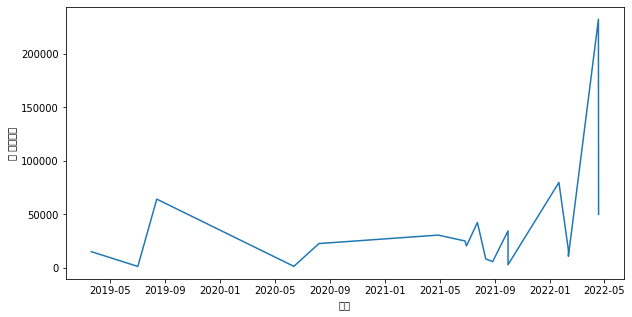

In [ ]:
# 이렇게 쪼개서 그리면 훨씬 보기 용이함
plt.figure(figsize=(10, 5))
sns.lineplot(x="날짜", y="총 리드타임", data = df6414_193_440_INNER_SOCKET)
plt.show()

In [ ]:
dfANODE = df[(df["품명"] == "ANODE") & (df["전체공정"] == "CNC > 입고처리")]
dfANODE

,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정
13482,N2008060090100,2000.0,510394.0,3.0,170131.33,2020-08-13 09:46:50.140,BU-AND-97170-00-0-01,ANODE,CNC > 입고처리
14103,N2009210260100,2000.0,456.0,10.0,45.60,2020-10-06 09:27:50.833,BU-AND-97170-00-0-01,ANODE,CNC > 입고처리
14953,N2009246100100,2000.0,4812.0,299.0,16.09,2020-09-24 15:35:39.870,BU-AND-97170-00-0-01,ANODE,CNC > 입고처리
16004,N2010280280100,2000.0,433510.0,30.0,14450.33,2020-11-03 11:11:55.203,BU-AND-97170-00-0-01,ANODE,CNC > 입고처리
18451,N2101070320100,2000.0,27.0,4.0,6.75,2021-01-12 14:48:30.673,BU-AND-97170-00-0-01,ANODE,CNC > 입고처리
...,...,...,...,...,...,...,...,...,...
34348,N2202140490100,2000.0,574172.0,50.0,11483.44,2022-02-21 13:12:08.870,BU-AND-97840-00-0-01,ANODE,CNC > 입고처리
35051,N2203080160100,2000.0,569077.0,50.0,11381.54,2022-03-29 08:37:01.277,BU-AND-97840-00-0-01,ANODE,CNC > 입고처리
35351,N2203210910100,2000.0,524100.0,20.0,26205.00,2022-03-29 10:36:04.140,BU-AND-97170-00-0-01,ANODE,CNC > 입고처리
35535,N2203240190100,2000.0,1120051.0,120.0,9333.76,2022-04-11 09:39:10.683,BU-AND-97840-00-0-01,ANODE,CNC > 입고처리


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

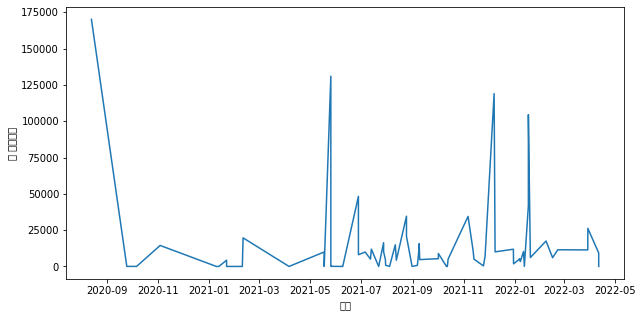

In [ ]:
# 이렇게 쪼개서 그리면 훨씬 보기 용이함
plt.figure(figsize=(10, 5))
sns.lineplot(x="날짜", y="총 리드타임", data = dfANODE)
plt.show()

# 이 밑은 위의 내가 원하는 것을 이루기 위한 시각화

- 같은 제품인데 다른 공정별로 리트타임을 원한다.

In [ ]:
df["품명"].value_counts()

UPPER FLANGE                                                          468
UNDER FLANGE                                                          410
TOP FLANGE                                                            319
Bottom Flange                                                         288
BOTTOM FLANGE                                                         250
                                                                     ... 
RJ_Multi Chamber 3'st Ass'y                                             1
RJ_Multi Chamber Flange                                                 1
IPS-02 SUS TANK REV3 (VERTICAL PUMP MODIFY) [Z09170908STR3]             1
OUTLET LOWER TOWER_TYPE T PART 2 (DOUBLE CLAMP) [SD-OL-TW-LW-MD02]      1
Head Weld Assy Leck Test Jig                                            1
Name: 품명, Length: 6682, dtype: int64

In [ ]:
dfSub = df[df["품명"] == "UPPER FLANGE"]

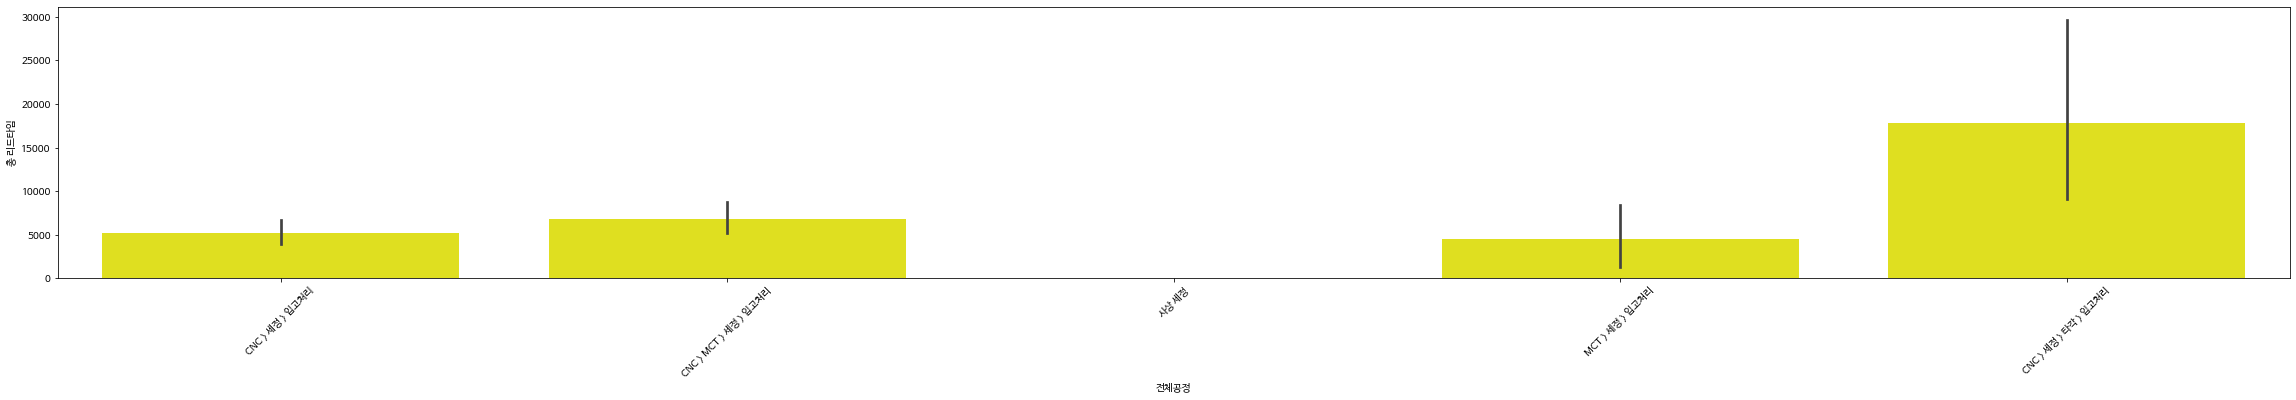

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
sns.barplot(x = '전체공정', y = '총 리드타임', data=dfSub, color = "yellow")
plt.show()